# Exploring Yelp Data - Sentiment Analysis and Analysing Elite Users

<br>

1. **Introduction - Data, Research Question, Summary**
1. **General Setup, Exploratory Plots, Data Preparation**
1. **Sentiment Classification for Restaurant Reviews**
1. **Exploring Yelp User Patterns - Elites as Potential Influencers**
1. **Going Deeper - Analysing Elites' Useful Reviews**
    1. **What Drives Elites' Positive/ Negative Sentiments for Fast Food Chains**
    1. **What Drives Elites' Positive/ Negative Sentiments for Italian Restaurants**
1. **Conclusion**
1. **References**


## 1) Introduction - Data, Research Question, Summary
Natural Language Processing (NLP) is an increasingly explored field of study by Machine Learning (ML) practitioners. Humans can deal with text format rather intuitively, but it is just not as scalable nor effective as using machines, given the large amount of documents that exist. Many ML algorithms and almost all deep learning architectures are not able to process strings or plain text in their raw format. To perform classification/ regression tasks etc., these algorithms require numbers as inputs. 

Given the large amount of useful insights that can be extracted from text data, many researchers have explored different word embedding techniques (text converted into numbers) to create a representation for words that could capture their meanings, semantic relationships and the different contexts they are used in. NLP is particularly largely explored by big businesses such as Amazon to analyse the sentiment contained in their customers'/ users' reviews for various purposes, especially marketing. One of the widely used word embedding methods is the frequency-based TF-IDF (term frequency–inverse document frequency), and we will explore this method in this report. 

Building on the aim of businesses to explore data for marketing purposes, it is also interesting to study the social network pattern between customers/ users - if some users of a business application is more "influential" than others. If this is true, then businesses can potentially explore the high centrality of some users to market their businesses to other users, increasing their exposure. 

In this report, we will explore some theories and applications from Social Network Theory to extract insights on users' centralities and their degree distributions. We believe that combining NLP with Social Network Analysis can reveal some really useful insights that can be utilized by businesses, especially as we narrow our context to specific business types. We would be able to identify factors that drive positive/ negative sentiments of users (especially for "influential" users, whose reviews may likely be seen more and thus, affect these businesses more).

We hope to be able to explore a large set of data with rich features efficiently, and to do this, we will apply the concepts/ methods mentioned above in a distributed setting, highlighting the efficiency and speedup obtained by using the Google Cloud Platform (GCP) and a distributed file system (Hadoop File System - hdfs). 


### 1.1 Data
The data that we will be using throughout this report is the Yelp Open Dataset. This rich dataset contains multiple data files, some of which are the 'user', 'business', 'review', 'checkin', 'tips', and 'photo' data. These files are available publicly as JSON files. Since this dataset is rather fluid, i.e. there are multiple versions released on Kaggle/ Yelp Website depending on the year of release, in this report, we are using data files sourced from Professor Milan Vojnovic's Dropbox (shared with us during class). The code used to extract these data files are as detailed in section 2.1. 

In this report, we will be using the three main data files, i.e. the 'review', 'business' and 'user' data. The sizes of the 'review', 'business' and 'user' data files are 3.22GB, 109.22MB and 1.10GB respectively. In total, we are analysing close to 4.5GB worth of data, which implies that it has substantial complexity with respect to some characteristics of big data, especially volume and variety, indicating the potential gain in speedup and efficiency by performing this analysis in a distributed setting. 

Going deeper into each data file that we are using, the first data set 'review' contains 4,153,150 rows of review data, with information on the business, user and review ids, the review text, star ratings given, date of review, and whether or not the review is labelled as cool/ useful/ funny. The second data set 'business' contains 144,072 rows of business data, with information on the business id/ name, the location of the business (address/ latitude/ longitude/ neighborhood/ city/ state/ postal code), average star ratings received, count of reviews, category of the business and its attributes, whether the business is open or not and the opening hours. The last data set that we will use is the 'user' data, which contains 1,029,432 rows of user data containing information on the user id/ name, number of reviews written, average star ratings given, counts of the different types of compliments received, the number of cool/ funny/ useful votes the user has sent, whether or not the user is an elite user, the number of fans that the user has, when the user started to use Yelp, and the user's friends on Yelp.  

More details and the schema of each data file are described in section 2.1, under subsection titled "Read in Data Files and Look at The Schema". As described, the datasets contain some really useful and rich features, enabling us to explore the techniques mentioned above and answer some really interesting questions (presented in the next subsection), while being sizable enough for us to experience the benefit of using distributed computing in this analysis. 

 
### 1.2 Research Questions/ Aims
This report aims to explore the NLP and several ML classification techniques to classify sentiments into positive/ negative, based on the text reviews and star ratings found in Yelp review data. Then, we aim to explore the user data and then incorporate insights gained from this analysis to analyse the factors behind positive/ negative sentiments in specific business types. We aim to perform this entire analysis in a distributed setting, to observe its potential benefits when analysing big data. Below are the titles of our main analyses and their respective aims/ research questions:

1) **Sentiment Classification for Restaurant Reviews**
* Aim to explore two concepts from NLP, i.e. TF-IDF and n-grams in text classification of reviews.
* Apply 3 ML Classification techniques, namely Support Vector Machine (SVM) with Stochastic Gradient Descent (SGD), Elastic Net Logistic Regression and Gradient Boosted Tree on the preprocessed and embedded review texts to classify the n-grams into positive/ negative sentiments.
* Evaluate the models and identify the best model based on the F1/ Area Under ROC/ Area Under Precision-Recall Curve scores.
* From the best model, identify potential improvement before arriving at the final ML classification model. 
* Extract the n-grams that are strongly associated with positive/ negative sentiments, to identify factors that generally lead users to write positive/ negative reviews. 

2) **Exploring Yelp User Patterns - Elites as Potential Influencers**
* Build a friendship graph for the users of Yelp, and from there calculate the degree centralities of users.
* Identify the degree distribution across all users, and relate with social network theory to identify potential "influencers" for marketing.
* Investigate if these "influencers" are mostly the 'elites' identified in the user data.
* Compare the features of the 'elites' to 'non-elites', to corroborate the importance of the 'elite' users and their reviews to business owners.
    
3) **Going Deeper - Analysing Elites' Useful Reviews**
* Once we have established the importance of the 'elites', we aim to narrow down our analysis to more specific business types, by analysing the reviews left by the 'elites' for two different types of restaurants, i.e. Fast Food restaurants and Italian restaurants. 
* Here, we aim to utilize the best classification model constructed earlier on the subsets of these reviews, and answer the question of "what drives elites' positive/ negative sentiments for Fast Food/ Italian restaurants?  


### 1.3 Summary of Findings
In our first analysis, we successfully applied the TF-IDF word embedding method to a combination of trigrams and unigrams extracted from Yelp's review data for restaurants. After performing 3 different ML classification techniques on these processed data, we found that the SVM with SGD model outperformed the Elastic Net Logistic Regression model and the Gradient Boosted Tree model, in terms of Area Under ROC (AUROC) and Area Under PR (AUPR) scores. Building on the best SVM model, we then changed the way we incorporated trigrams into our model with unigrams - instead of selecting them based on their frequencies of appearance, we selected them based on their weights from another SVM model's results. 

We found improvements in the model and thus, we made this our final model (with very high F1 score of 0.9467, AUROC of 0.9271 and AUPR of 0.9518). Extracting unigrams/ trigrams with the biggest positive/ negative weights, we found several factors that correlate strongly with the positive/ negative experiences that Yelp users had across these restaurants in general. Some of the positive aspects highlighted include freshly prepared food, authentic food, good selection of menu, good customer service and nice atmosphere. Most of the negative reviews are driven by poor food quality, overpriced food, long waiting time and poor physical conditions of the restaurants. We also found that most happy customers promised to come back while the opposite is true for the unhappy ones. 

In our second analysis, we explored the in-degree distribution of Yelp users, and discovered that the network follows the power law and is a scale-free network, with most users having very few connections and a handful of users with very large number of connections (regarded as the "influencers"). Due to the ability of these "influencers" to spread information rather quickly across the network, we suggest potential viral/ targeted marketing opportunity for business owners, by engaging with the "influencers". Given that it is more convenient to identify and connect with the 'elites', we took a step further by comparing the 'elites' to 'non-elites' in terms of their in-degrees centralities, number of fans, total compliments received, and number of reviews written. Looking at these measures as proxies of "influence", we found a general and average pattern whereby the 'elites' seem to be more "influential" than the 'non-elites'. We then suggested that business owners looking for "influencers" for viral/ targeted marketing purpose on Yelp should indeed approach these 'elites', but since there are still some variations within the 'elite' group, any approach is best accompanied with a quick profile lookup. 

In our third analysis, we went deeper by analyzing reviews posted by the 'elites' for two business types, i.e. Fast Food restaurants and Italian restaurants, in order to extract more specific aspects of these businesses that the 'elites' find appealing/ appalling. We used the same SVM model architecture from the first analysis on these two sets of reviews and again achieved excellent model performances, with both models for Fast Food restaurants and Italian restaurants recording over 90% F1 scores. We then looked at the unigrams/ trigrams with the biggest weights across both business types, identifying specific aspects of the businesses that the 'elites' associate with negative/ positive sentiments. There are still general expectations that are similar across both types of restaurants (although variations still exist in terms of the weightages placed on each aspect across both business types), such as good menu selection, big portions, clean surroundings, quick and good customer service, reasonable pricing, and the general taste and texture of food. 

The most interesting findings are of course the more specific ones - for Fast Food restaurants, among the aspects that the 'elites' deem positive are healthy food options, online option, freebies received, as well as good ingredients and toppings. For Italian restaurants on the other hand, intimate atmosphere, wine, homemade food, as well as good parking allocation seem to be important. These suggest that indeed, we can extract many useful insights from the elites' reviews and business owners should take note of their suggestions/ comments, as they are generally very well-connected and can spread either positive/ negative reviews rather quickly throughout the network. 

Finally, we showed that by performing these analyses in a distributed setting and by scaling up the clusters, we managed to gain some speedup in terms of the time taken to run all codes including training the ML models. By scaling up from using 2 worker nodes to 4 worker nodes on GCP, we were able to reduce the time taken to run all codes by about 13%. 

## 2) General Setup, Exploratory Plots, Data Preparation


### 2.1 General Setup 
#### Terminal Codes
Below are the codes ran in the terminal locally to set up the clusters and extract the relevant data. First step, create a bucket and copy the my-actions.sh configuration file from Week 9 into the bucket created.  

```{bash}
(base) Nazihahs-MacBook-Pro:~ Nazihah$ gsutil mb gs://sitinazihah-bucket/
(base) Nazihahs-MacBook-Pro:~ Nazihah$ cd ST446/lectures2020/Week09/class
(base) Nazihahs-MacBook-Pro:class Nazihah$ gsutil cp my-actions.sh gs://sitinazihah-bucket/
```

Then, another bucket is created with the name of 'dataproc-staging-europe-west2-626077825834-msc8tnod' online on the Google Cloud Platform (GCP). This is done because without creating this bucket, an error message will pop-up unabling us to create the clusters. Next, the cluster is created. Below, we are including the codes to set up a cluster with 4 worker nodes. In practice, we also experimented with different number of worker nodes to observe the potential training speedup. 

```{bash}
(base) Nazihahs-MacBook-Pro:class Nazihah$ gcloud dataproc clusters create sitinazihah-cluster --project idyllic-parser-266123 --properties=^#^spark:spark.jars.packages=graphframes:graphframes:0.5.0-spark2.1-s_2.11,com.databricks:spark-xml_2.11:0.4.1 --region europe-west2 --subnet default --zone europe-west2-c --master-machine-type n1-standard-4 --master-boot-disk-size 500 --num-workers 4 --worker-machine-type n1-standard-4 --worker-boot-disk-size 500 --image-version 1.3-deb9 --initialization-actions gs://dataproc-initialization-actions/jupyter/jupyter.sh,gs://dataproc-initialization-actions/python/pip-install.sh,gs://sitinazihah-bucket/my-actions.sh --metadata 'PIP_PACKAGES=sklearn nltk pandas numpy seaborn wordcloud graphframes'
```

After the cluster is created, we enter the clusters and extract the relevant data, before placing the files into the Hadoop File System (hdfs). 

```{bash}
(base) Nazihahs-MacBook-Pro:class Nazihah$ gcloud beta compute ssh --zone "europe-west2-c" "sitinazihah-cluster-m" --project "idyllic-parser-266123"

Nazihah@sitinazihah-cluster-m:~$ wget https://www.dropbox.com/sh/89xbpcjl4oq0j4w/AAD-f3xffvIcye-7ZPPrknmHa/Yelp/yelp_academic_dataset_review.json?dl=0

Nazihah@sitinazihah-cluster-m:~$ wget https://www.dropbox.com/sh/89xbpcjl4oq0j4w/AAD5gd9_feyMwGorgxIh-Ep-a/Yelp/yelp_academic_dataset_business.json?dl=0

Nazihah@sitinazihah-cluster-m:~$ wget https://www.dropbox.com/sh/89xbpcjl4oq0j4w/AAC4_qW_wKyGIXXYZOwZC-Wia/Yelp/yelp_academic_dataset_user.json?dl=0

Nazihah@sitinazihah-cluster-m:~$ mv yelp_academic_dataset_review.json?dl=0 yelp_academic_dataset_review.json
Nazihah@sitinazihah-cluster-m:~$ mv yelp_academic_dataset_business.json?dl=0 yelp_academic_dataset_business.json
Nazihah@sitinazihah-cluster-m:~$ mv yelp_academic_dataset_user.json?dl=0 yelp_academic_dataset_user.json

Nazihah@sitinazihah-cluster-m:~$ mkdir yelp

Nazihah@sitinazihah-cluster-m:~$ mv yelp_academic_dataset_review.json yelp
Nazihah@sitinazihah-cluster-m:~$ mv yelp_academic_dataset_business.json yelp
Nazihah@sitinazihah-cluster-m:~$ mv yelp_academic_dataset_user.json yelp

Nazihah@sitinazihah-cluster-m:~$ hadoop fs -put ~/yelp/ / 
Nazihah@sitinazihah-cluster-m:~$ hadoop fs -ls /
Found 4 items
drwx------   - mapred  hadoop          0 2020-05-08 15:16 /hadoop
drwxrwxrwt   - hdfs    hadoop          0 2020-05-08 15:16 /tmp
drwxrwxrwt   - hdfs    hadoop          0 2020-05-08 15:15 /user
drwxr-xr-x   - Nazihah hadoop          0 2020-05-08 15:54 /yelp
```

Then, two new terminal windows are open and the two lines of codes below are run, one in each terminal window to launch Jupyter Notebook on Google Chrome. Then, this Jupyter Notebook file is uploaded.

```{bash}
(base) Nazihahs-MacBook-Pro:~ Nazihah$ gcloud compute ssh sitinazihah-cluster-m \
>   --project=idyllic-parser-266123 \
>   --zone=europe-west2-c -- -D 1080 -N

(base) Nazihahs-MacBook-Pro:~ Nazihah$ "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome" \
>   --proxy-server="socks5://localhost:1080" \
>   --user-data-dir="/tmp/sitinazihah-cluster-m" http://sitinazihah-cluster-m:8123
```

<br>

**Once this Jupyter Notebook file is uploaded and opened on the GCP, we then begin with importing all the required modules as below:**

In [1]:
from pyspark.sql.types import *
import pyspark.sql.functions as func
from pyspark.sql.functions import udf, col, array_contains
from pyspark.ml.feature import Tokenizer, StopWordsRemover, NGram, CountVectorizer, IDF
from pyspark.mllib.classification import SVMWithSGD
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.linalg import Vectors as MLLibVectors
from pyspark.ml.classification import LogisticRegression, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
import pyspark.ml.tuning as tune
import numpy as np
import pandas as pd
import seaborn as sns
import graphframes
from graphframes import *
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.4.0-spark2.0-s_2.11,com.databricks:spark-xml_2.11:0.4.1 pyspark-shell'
import time
import string
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from PIL import Image
#import Random
sc.defaultParallelism

4

#### Read in Data Files and Look at The Schema

In [2]:
# Define the folder path
folder = "hdfs:///yelp/"

# Read in review data and print out the schema
review = sqlContext.read.json(folder+"yelp_academic_dataset_review.json")
review.createOrReplaceTempView("review")
review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: long (nullable = true)
 |-- text: string (nullable = true)
 |-- type: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



Below are the interpretations for the features listed above:
* business_id/ review_id/ user_id - business id/ review id/ user id corresponding to the review written
* cool/ funny/ useful - number of cool/ funny/ useful votes received by the review
* date - date of review
* stars - star rating assigned corresponding to the review
* text - the actual review text written

In [3]:
# Have a look at one review entry
print(type(review))
print(review.head(1))

<class 'pyspark.sql.dataframe.DataFrame'>
[Row(business_id='2aFiy99vNLklCx3T_tGS9A', cool=0, date='2011-10-10', funny=0, review_id='NxL8SIC5yqOdnlXCg18IBg', stars=5, text="If you enjoy service by someone who is as competent as he is personable, I would recommend Corey Kaplan highly. The time he has spent here has been very productive and working with him educational and enjoyable. I hope not to need him again (though this is highly unlikely) but knowing he is there if I do is very nice. By the way, I'm not from El Centro, CA. but Scottsdale, AZ.", type='review', useful=0, user_id='KpkOkG6RIf4Ra25Lhhxf1A')]


In [4]:
# Read in business data and print out the schema
business = sqlContext.read.json(folder+"yelp_academic_dataset_business.json")
business.createOrReplaceTempView("business")
business.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- business_id: string (nullable = true)
 |-- categories: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- city: string (nullable = true)
 |-- hours: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- is_open: long (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- name: string (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- stars: double (nullable = true)
 |-- state: string (nullable = true)
 |-- type: string (nullable = true)



Below are the interpretations for the features listed above:
* business_id/ name - business id/ name of the business
* address/ city/ latitude/ longitude/ neighborhood/ postal code/ state - various aspects of the location of the business, as the names suggest
* stars - average star ratings received (rounded to half-stars)
* review_count - number of reviews for the business
* attributes - business attributes to values, for eg. "BusinessParking": {"garage": false, "street": true}
* categories - business category (a business can have multiple categories)
* is_open - whether the business is open or not 
* hours - opening hours, an object of key day to value hours, hours are using a 24hr clock

In [5]:
# Have a look at one business entry
print(business.head(1))

[Row(address='227 E Baseline Rd, Ste J2', attributes=['BikeParking: True', 'BusinessAcceptsBitcoin: False', 'BusinessAcceptsCreditCards: True', "BusinessParking: {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'DogsAllowed: False', 'RestaurantsPriceRange2: 2', 'WheelchairAccessible: True'], business_id='0DI8Dt2PJp07XkVvIElIcQ', categories=['Tobacco Shops', 'Nightlife', 'Vape Shops', 'Shopping'], city='Tempe', hours=['Monday 11:0-21:0', 'Tuesday 11:0-21:0', 'Wednesday 11:0-21:0', 'Thursday 11:0-21:0', 'Friday 11:0-22:0', 'Saturday 10:0-22:0', 'Sunday 11:0-18:0'], is_open=0, latitude=33.3782141, longitude=-111.936102, name='Innovative Vapors', neighborhood='', postal_code='85283', review_count=17, stars=4.5, state='AZ', type='business')]


In [6]:
# Read in user data and print out the schema
user = sqlContext.read.json(folder+"yelp_academic_dataset_user.json")
user.createOrReplaceTempView("user")
user.printSchema()

# Since each user data is very long and will cause the presentation of this report
# to not look neat especially on Github, we will comment out the part where we had a 
# look at one user data entry.
#print(user.head(1))

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- fans: long (nullable = true)
 |-- friends: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- type: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nu

Below are the interpretations for the features listed above:
* user_id/ name - id/ name of the user
* average_stars - average of star ratings assigned
* compliment_xx - number of xx compliments received by the user
* cool/ funny/ useful - number of cool/ funny/ useful votes sent by the user
* elite - the years the user was elite
* fans - number of fans the user has
* friends - an array of the user's friend as user_ids
* review_count - number of reviews written by the user
* yelping_since - when the user joined Yelp, formatted like YYYY-MM-DD

### 2.2 Exploratory Plots and Data Preparation
Now that we have loaded in the data files and looked at their respective schema, let's visualize some of the data that we are interested in. First, we would like to see the distribution of the different types of businesses on Yelp, as well as the total number of different business classes that exist. Note that, these business classes are not mutually exclusive - a business may be classified under 'Restaurant', 'Italian', 'Food', etc. all at the same time, depending on the products/ services being offered by the businesses.

There are altogether 1192 different business categories in Yelp.


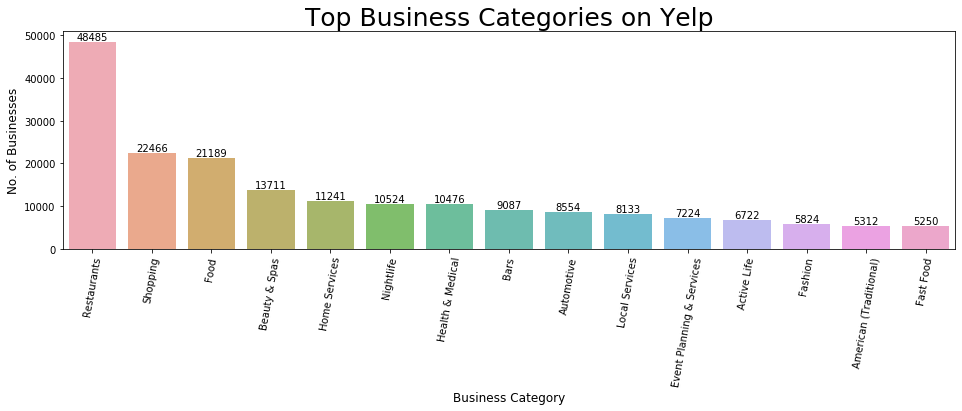

In [100]:
# Plot the different business categories according to their prevalence on the Yelp site
# First, convert dataframe to pandas to ease plotting
business_pd = business.toPandas()

# Prepare data 
category = ",".join([str(business_pd["categories"][i]).replace("[", "").replace("]", "") \
              .replace(", ", ",").replace("'", "") for i in range(len(business_pd))])
b_category = pd.DataFrame(category.split(','), columns=['category'])
category_count = b_category.category.value_counts()
print("There are altogether", len(category_count), "different business categories in Yelp.")

# Prepare to plot the top 15 business categories
category_count = category_count.sort_values(ascending=False)
category_count = category_count.iloc[0:15]

# Plot 
plt.figure(figsize = (16,4))
ax = sns.barplot(category_count.index, category_count.values, alpha = 0.8)
plt.title("Top Business Categories on Yelp", fontsize = 25)
loc, labels = plt.xticks()
plt.setp(labels, rotation = 80)
plt.ylabel('No. of Businesses', fontsize = 12)
plt.xlabel('Business Category', fontsize = 12)
 
# Add labels
rectangles = ax.patches
labels = category_count.values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

From the above, we could see that there are altogether 1,192 distinct business categories for the business dataset that we have. The plot above shows the top 15 business categories according to the number of businesses that have signed up on Yelp across these categories. We can observe that 'Restaurants' is the most prevalent business type on Yelp, with 48,485 businesses registered. Even looking across the top 15 business categories, food business in general seems to be the most popular business category on Yelp, with 5 out of the 15 top categories have to do with food business ('Restaurants', 'Food', 'Bars', American (Traditional) and 'Fast Food').

Next, we look at how the star ratings are distributed across these businesses, as below.

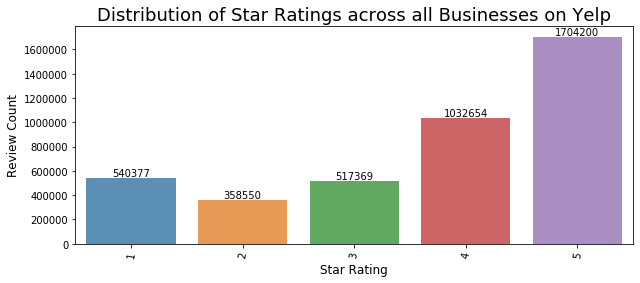

In [15]:
# Plot the distribution of star ratings across all businesses

# Extract all ratings from the Review dataset and group them by the star ratings
stars_distr = review.groupBy('stars').agg(func.count('review_id') \
                    .alias('count')).sort('stars').toPandas()


# Plot the count of each star rating across all reviews
plt.figure(figsize = (10,4))
ax = sns.barplot(stars_distr['stars'], stars_distr['count'], alpha = 0.8)
plt.title("Distribution of Star Ratings across all Businesses on Yelp", 
          fontsize = 18)
loc, labels = plt.xticks()
plt.setp(labels, rotation = 80)
plt.ylabel('Review Count', fontsize = 12)
plt.xlabel('Star Rating', fontsize = 12)

rectangles = ax.patches
labels = stars_distr['count']
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

From the plot above, we can observe that generally, users are mostly driven to post a review on Yelp when they are very satisfied with the experience they have with these businesses (ratings = 5 and 4). It is also interesting to note that the next star rating with the most count after the two most positive ratings is the most negative rating, i.e. 1. These observations make sense, as customers/ users tend to get motivated by the good experience that they have to write something in support of the businesses. At the same time, when a customer experiences something very negative, one of the best mediums to vent their frustration/ disappointment is by writing a negative review either to warn others, or to provide feedback to the businesses, so that they would not need to experience something similar again. 

Before we dive into our first main analysis which is to perform sentiment classification, we first select a subset of the reviews for analysis. Below are our key selection features and the reason behind our selection decisions:

1) **Only select reviews for restaurant businesses**
* Here, we are interested in identifying factors that drive users' reviews - be it positive or negative, and we are particularly interested in the restaurant businesses, which as seen in the first plot above, is the most prominent business type on Yelp.
* Since our aim is to identify words/ group of words that users associate with positive/ negative sentiment, it is better to look at a specific business type, as different business types may have different aspects that users are happy/ unhappy with. To illustrate, we would expect a review on a food business to be very different from a review on say, a spa business. There are different general expectations across different business types, and if we were to look at them all together, we would not be able to extract much useful information, as they would all be mixed. 

2) **Only select reviews that are labelled as useful by at least one user**
* As the nature of reviews is such that there may be fake reviews, or reviews that do not make sense, here we are going to filter the dataset to only analyse reviews that have been rated as useful by at least one other user. This will help us to focus more on the aspects of reviews that are deemed useful.

3) **Only select positive reviews (rated as 4 or 5 stars) and negative reviews (rated as 1 or 2 stars), exclude neutral reviews (rated as 3 stars)**
* From the distribution of star ratings (the plot above), we inferred that majority of users will be motivated to write reviews if they are very pleased/ very dissatisfied with the businesses. At the same time, neutral reviews are typically not associated with strong positive/ negative sentiments - they are usually customers who like certain aspects of the business and dislike some other aspects of the business.
* In this analysis, we are more focused on identifying business aspects that make people happy/ unhappy rather than a mixture of both, thus we will exclude neutral reviews, as we are not particularly interested in classifying a neutral sentiment. 

Below are the codes written to extract the reviews according to the conditions listed above: 

In [8]:
# Get all restaurant businesses - select only business id and the categories
business_restaurant = business.select('business_id', 'categories') \
                              .where(array_contains("categories", 'Restaurants'))


# Get all useful reviews, i.e. a review with at least one useful vote and 
# here we are excluding all neutral reviews as well
review_useful = review.select('business_id', 'review_id', 'stars', 
                              'text', 'useful', 'user_id') \
                      .where("useful >= 1 and stars != 3")


# Join the two dataframes above to get all useful reviews for restaurant businesses
restaurant_useful_review = business_restaurant.join(review_useful, 
                                                    [business_restaurant.business_id == review_useful.business_id], 
                                                    how = 'inner') \
                                              .select(review_useful.business_id, review_useful.stars, 
                                                      review_useful.text, review_useful.useful, 
                                                      review_useful.review_id, review_useful.user_id)

In [11]:
# Have a look at the first 5 entries of the joined dataframe
restaurant_useful_review.show(5)

+--------------------+-----+--------------------+------+--------------------+--------------------+
|         business_id|stars|                text|useful|           review_id|             user_id|
+--------------------+-----+--------------------+------+--------------------+--------------------+
|--9e1ONYQuAa-CB_R...|    5|"WOW!!!" that's w...|     1|pa4MASGD-2EFoR_rG...|5aFBj0emFzoXsUcKb...|
|--9e1ONYQuAa-CB_R...|    1|I visited this pl...|     1|8N_ZSR4q3m2dTpWyB...|n0y7p7B1NMia_3lpk...|
|--9e1ONYQuAa-CB_R...|    4|Delmonico is a te...|     1|aVor8Ttm0RT3JBvv6...|aP4BkNgP4wzQ5woQM...|
|--9e1ONYQuAa-CB_R...|    2|Given the big nam...|     1|PguageQLbgZPsnzSx...|aBMgdtHYfs3MnMz6t...|
|--9e1ONYQuAa-CB_R...|    5|Must say it was a...|     1|vvHi9OhJ0OHK_8EnI...|aSbPx1DDyJ29FNaMM...|
+--------------------+-----+--------------------+------+--------------------+--------------------+
only showing top 5 rows



In [1]:
# Count the number of useful reviews
print("There is a total of", restaurant_useful_review.count() ,"useful restaurant reviews.")

There is a total of 894023 useful restaurant reviews.


Even after imposing the conditions above and choosing only useful restaurant reviews that exclude neutral reviews, we still have close to 900k reviews out of the total 4.15mil reviews, implying that most of the reviews written are indeed for restaurant businesses. This also implies that we are still working with a really large amount of data, thus able to benefit from the distributed setting. Before we proceed with our first main analysis, below is one last plot to see the distribution of reviews for our subset of reviews. 

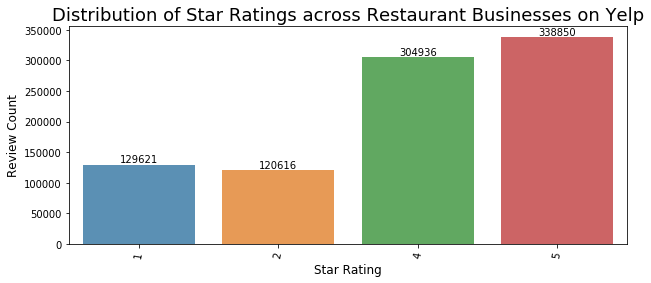

In [22]:
# Before we begin with our analysis, have a look at the distribution of star ratings
# across these useful restaurant reviews
stars_distr_rest = restaurant_useful_review.groupBy('stars') \
                                           .agg(func.count('review_id') \
                                           .alias('count')).sort('stars') \
                                           .toPandas()

# Plot the figure 
plt.figure(figsize = (10,4))
ax = sns.barplot(stars_distr_rest['stars'], stars_distr_rest['count'], alpha = 0.8)
plt.title("Distribution of Star Ratings across Restaurant Businesses on Yelp", fontsize = 18)
loc, labels = plt.xticks()
plt.setp(labels, rotation = 80)
plt.ylabel('Review Count', fontsize = 12)
plt.xlabel('Star Rating', fontsize = 12)

rectangles = ax.patches
labels = stars_distr_rest['count']
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Again, we could see the imbalance in the distribution of star ratings, whereby users are more motivated to write  positive reviews than negative reviews. We could also see similarities in review counts for both subclasses of positive/ negative ratings (similar numbers for star ratings of 1 and 2, and for 4 and 5). However, there are always slightly more extremely negative(1)/ extremely positive(5) ratings than there are moderately negative(2)/ moderately positive ratings(4). As the reviews are rather imbalanced, it is good to keep in mind that accuracy may not be the best measure when comparing the performances of classification models later. Thus, we will be using a combination of Area Under ROC curve (AUROC)/ Area Under Precision-Recall Curve (AUPR) and F1 score (whenever possible). F1 score, which is a weighted average of precision and recall, is chosen as it could reveal how well the model performs in identifying both the predictions relevance and the percentage of truly relevant results that are correctly predicted.

## 3) Sentiment Classification for Restaurant Reviews

In this section, we are going to perform two main tasks. First, we are going to perform word embedding using the TF-IDF method to obtain the numerical representation of the words/ group of words that we are interested in. Then, we are going to perform a two-class sentiment classification task using the features obtained. Below we summarize the background/ intuition of the methods that we are going to apply in this analysis.


### 3.1 Background of Techniques Used
#### 3.1.1 TF-IDF 
TF-IDF [1] stands for term frequency-inverse document frequency. It is a frequency-based method for vectorizing words. However, it is different than the basic count vectorization in the sense that it considers the occurrence of a word in the entire corpus instead of just in a single document. 

To illustrate, a document on Logistic Regression is going to contain more occurrences of the word "Regression" compared to other documents. However, common words like "the", "are", etc. are also going to appear frequently in almost all documents. TF-IDF works by weighing down common words occurring in almost all documents, giving more importance to words that appear in a subset of documents. It works by penalizing the common words appearing in all documents by assigning them lower weights, while simultaneously giving more importance to words like "Regression" (still on the same example) in that particular document.

So, how does it work mathematically? Consider the example below, giving two documents with the counts of terms in each document.

<img src="image/tfidf.png" width="300" height="300" />

First, let's define TF. TF = $\frac{n_t}{T}$ whereby $n_t$ = number of times term t appears in a document, and $T$ is the total number of terms in the document. In the example above, TF("This", Document 1) = 1/8, whereas TF("This", Document 2)=1/5. Here, we can see that it denotes the contribution of the word to the document.

IDF on the other hand, is defined as IDF = $log(\frac{N}{n})$ whereby $N$ is the number of documents and $n$ is the number of documents a term $t$ has appeared in. Thus, IDF("This") = $log(\frac{2}{2}) = 0$. The reasoning behind IDF is that if a word has appeared in all documents, then highly likely that word is not relevant to a particular document. However, if the term has appeared in a subset of documents, then it is likely that the term is of some relevance to the documents that it is present in. The IDF for the word "regression" is IDF("regression") = $log(\frac{2}{1}) = 0.301$. Finally, let's compare the TF-IDF for a common word "This" and a word "regression" which from the table above, seems to be of relevance to Document 1. 

TF-IDF("This", Document 1) = (1/8)*(0) = 0

TF-IDF("This", Document 2) = (1/5)*(0) = 0

TF-IDF("regression", Document 1) = (4/8)*(0.301) = 0.15

From above, we can see that the TF-IDF method heavily penalizes the word "This", but assigns greater weight to the term "regression". This then translates to "regression" being an important term for Document 1, looking from the context of the entire corpus. 



#### 3.1.2 Support Vector Machines (SVM) 
SVM is a supervised ML algorithm that can be used for both regression and classification problems, but are mostly used for classification problems. In this algorithm, we would plot each data item as one point in f-dimensional space (where f is the number of features we have) with each feature value being the value for a particular coordinate. Classification is then performed by looking for the separating hyper-plane that segregates the 2 classes the best (in the case of binary classification problem). The image below demonstrates how SVM works for a simple 2-class classification problem:

<img src="image/svm1.png" width="300" height="300" />

In the above, C is the best separating hyper-plane as it has the largest margin compared to A and B. Selecting C ensures robustness as there is lower chance of misclassification. The SVM algorithm also has a feature such that it is able to ignore outliers and find the hyper-plane with the maximum margin. Hence, it is also robust to outliers, as seen in the image below.

<img src="image/svm2.png" width="300" height="300" />

What about when there is no linear hyper-plane that can segregate the classes well? The SVM can solve this problem by introducing additional feature via a technique called the kernel trick. This is part of the SVM algorithm and it enables the SVM to convert a non-separable problem into a separable one. The image below illustrates how the SVM is able to come up with a non-linear separating hyper-plane. 

<img src="image/svm3.png" width="300" height="300" />


#### 3.1.3 Elastic Net Logistic Regression 
Elastic Net Logistic Regression is simply a regularized regression method that linearly combines the L1 and L2 penalties of the LASSO and ridge methods. Logistic regression is a regression analysis performed for 2-class classification problems (but there are extensions that enable multi-class classification too). [3] In general, logistic regression uses: 

$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}} \in [0,1]$

which can then be rewritten as the log odds/ logit transformation of $p(X)$:

$log(\frac{p(X)}{1-p(X)}) = \beta_0 + \beta_1X$

The elastic net method is used to overcome the limitations of the LASSO method which uses a penalty function based on:

$||\beta||_1 = \sum \limits_{j=1}^{p}|\beta_j|$

where p is the number of features and n is the number of observations. Using this penalty function comes with several limitations, i.e. in the "large p, small n" case, the LASSO selects at most n variables before it saturates. Another weakness is that if there is a group of highly correlated variables, the LASSO tends to select one variable from a group and ignore the others. The elastic net overcomes these limitations by adding a quadratic part to the penalty ($||\beta||^2$), i.e. the ridge regression penalty. The estimates from the elastic net method are then defined by:

$\hat{\beta} = argmin_\beta (||y - X\beta||^2 + \lambda_2||\beta||^2 + \lambda_1||\beta||_1)$

Since an elastic net model is more stable when dealing with highly correlated features, it is a good model to use when dealing with NLP. 


#### 3.1.4 Gradient Boosting 
Gradient Boosting is a ML technique for classification/ regression problems, that produces a prediction model in the form of an ensemble of weak prediction models which are typically decision trees. This method builds the model in a stage-wise fashion, i.e. it builds trees one at a time, where each new tree helps to correct errors made by previously trained tree.

The two previous methods (SVM and Elastic Net Logistic Regression) are chosen largely due to the interpretable nature of their feature coefficients, as well as their reputation as effective classifier algorithms for NLP applications. This Gradient Boosting method is chosen as it has been claimed to perform well in highly unbalanced settings, and this may help with our analysis, as our positive/ negative reviews are rather imbalanced. 

This method has several strengths and weaknesses that we should pay attention to. Since boosted trees are derived by optimizing an objective function, this method can basically be used to solve almost all objective functions that we can write their gradients out. However, this method is more sensitive to overfitting if the data is noisy (this may be an issue for text classification), and the training takes a long time since trees are built sequentially.  

<br>

### 3.2 Text Pre-Processing
Before we can apply the TF-IDF vectorization method to our review data, we first need to pre-process the text data. This process begins with removing punctuations, then we are going to convert the 4 available star ratings to binary sentiments (1 and 2 stars are regarded as negative sentiment and labelled as 0; 4 and 5 stars are regarded as positive sentiment and labelled as 1). After this is done, we are going to perform tokenization on the words and remove stop words. 

#### 3.2.1 Remove Punctuations and Convert Star Ratings to Sentiments
The code cell below details out the implementation. We have written two functions - one is to remove all punctuation signs and numbers, and another to convert the star ratings to sentiments. Then, using udf (user-defined functions) function in PySpark, we are going to generate the dataframe with selected columns including the newly-defined 0-1 labels for sentiments. 

In [12]:
# Define a function that uses the Regular Expression (re module) 
# to remove punctuations and numbers
def remove_punctuation(input):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    punct_removed = regex.sub("", input)
    return punct_removed


# Generate positive sentiment (=1) and negative sentiment (=0) from the star ratings
# Here, we set star ratings >=4 to positive sentiment and <=2 to negative sentiment
def generate_sentiment(star):
    star = int(star)
    if star >= 4: 
        return 1
    else: 
        return 0

    
# Use udf to perform the above functions
punctuation_remover = udf(lambda x: remove_punctuation(x))
sentiment_generator = udf(lambda x: generate_sentiment(x))


# Create a new dataframe with the above operations
df_review = restaurant_useful_review.select('review_id', punctuation_remover('text'), 
                                            sentiment_generator('stars'))

df_review = df_review.withColumnRenamed('<lambda>(text)', 'text') \
                     .withColumn('label', df_review['<lambda>(stars)'].cast(IntegerType())) \
                     .drop('<lambda>(stars)')


# Have a look at 5 line items
df_review.show(5)

+--------------------+--------------------+-----+
|           review_id|                text|label|
+--------------------+--------------------+-----+
|pa4MASGD-2EFoR_rG...|WOW thats what sh...|    1|
|8N_ZSR4q3m2dTpWyB...|I visited this pl...|    0|
|aVor8Ttm0RT3JBvv6...|Delmonico is a te...|    1|
|PguageQLbgZPsnzSx...|Given the big nam...|    0|
|vvHi9OhJ0OHK_8EnI...|Must say it was a...|    1|
+--------------------+--------------------+-----+
only showing top 5 rows



#### 3.2.2 Perform tokenization and remove stop words for single words 
The code cell below performs tokenization on the text column, generating the words column, and from the words column, stop words are removed, generating another column called 'words_no_sw', i.e. words with no stop words. 

In [13]:
# Perform tokenization
tokenize = Tokenizer(inputCol="text", outputCol="words")
tokenized_review = tokenize.transform(df_review)

# Remove stop words
remove_stopwords = StopWordsRemover(inputCol="words", outputCol="words_no_sw")
tokenized_review = remove_stopwords.transform(tokenized_review)

# Have a look at 5 line items
tokenized_review.show(5)

+--------------------+--------------------+-----+--------------------+--------------------+
|           review_id|                text|label|               words|         words_no_sw|
+--------------------+--------------------+-----+--------------------+--------------------+
|pa4MASGD-2EFoR_rG...|WOW thats what sh...|    1|[wow, thats, what...|[wow, thats, said...|
|8N_ZSR4q3m2dTpWyB...|I visited this pl...|    0|[i, visited, this...|[visited, place, ...|
|aVor8Ttm0RT3JBvv6...|Delmonico is a te...|    1|[delmonico, is, a...|[delmonico, terri...|
|PguageQLbgZPsnzSx...|Given the big nam...|    0|[given, the, big,...|[given, big, name...|
|vvHi9OhJ0OHK_8EnI...|Must say it was a...|    1|[must, say, it, w...|[must, say, tasty...|
+--------------------+--------------------+-----+--------------------+--------------------+
only showing top 5 rows



### 3.3 Generate Trigrams and  Include Those Appearing Frequently (>= 50 times) Alongside Words (Unigrams) 

When performing sentiment analysis, it is always a good practice to include phrases alongside words [2]. This is because when looking at only single words (with stop words removed), we may miss the actual context of the review. Most importantly, negative reviews may seem positive, especially when negations are removed. Example as below:
* Review - ```"I will not recommend this place"```
* Tokenized and cleaned review - ```"will recommend place" ```

Thus, we are going to add trigrams (group of three words) to unigrams (single words) and then model them together. This is useful as words such as "will not recommend" will be considered as one term instead of split into "will", "not", "recommend", which would experience a change in context once stop words are removed and the negation is gone. 
However, not all trigrams are going to be useful - here, to avoid including random phrases that are not helpful in our sentiment classification task, we only include trigrams that have appeared more than 50 times in the entire corpus, as below.

In [2]:
# Add a trigram column to the tokenized_review dataframe
trigram = NGram(inputCol = 'words', outputCol = 'trigram', n = 3)
add_trigram = trigram.transform(tokenized_review)


# Find trigrams that have appeared more than 50 times 
trigrams = add_trigram.rdd.flatMap(lambda x: x[-1]).filter(lambda x: len(x.split())==3)
trigram_count = trigrams.map(lambda x: (x, 1)) \
                        .reduceByKey(lambda x,y: x+y) \
                        .filter(lambda x: x[1] >= 50)


# Collect the trigrams in a list
trigram_list1 = trigram_count.map(lambda x: x[0]).collect()


# Print the first 10 entries in the list to have a quick look at the trigrams
print(trigram_list1[:10])

['next time i', 'seems to have', 'if you come', 'i was really', 'in vegas and', 'of this place', 'the best service', 'and that is', 'say the food', 'so this is']


### 3.4 Trigram Pre-Processing, Tokenization of Combined Unigrams and Trigrams, and TF-IDF
Once the trigrams are identified, we then join them together using "_", so that they will not be considered as separate words when tokenization is performed later. Next, we replace the original text corresponding to the selected trigrams with the joined trigrams. To do this, we define a function called 'replace_trigram' as below. 

After that, we perform tokenization and the removal of stop words again on the transformed data frame. Then, we apply TF using CountVectorizer (BagOfWords) method, and then IDF on the resulting data frame, to generate the numerical representation for the unigrams/ trigrams.  

In [18]:
# Define a function to replace the group of words that have been identified 
# as useful trigrams with their trigram version.
def replace_trigram(text):
    text_edited = remove_punctuation(text.lower())
    for trigram in trigram_list1:
        if trigram in text_edited:
            trigram1 = trigram.replace(" ", "_")
            text_edited = text_edited.replace(trigram, trigram1)
    return text_edited

trigram_df = udf(lambda x: replace_trigram(x))
trigram_df = tokenized_review.select(trigram_df('text'), 'label') \
                             .withColumnRenamed('<lambda>(text)', 'text')


# Perform tokenization and remove stop words with trigram
tokenized_trigram = tokenize.transform(trigram_df)
tokenized_trigram = remove_stopwords.transform(tokenized_trigram)


# Use Count vectorizer and TF-IDF 
# Here, we use IDF separately as we already use CountVectorizer
cv = CountVectorizer(inputCol='words_no_sw', outputCol='tf')
cv_model = cv.fit(tokenized_trigram)
count_vectorized = cv_model.transform(tokenized_trigram)

idf = IDF().setInputCol('tf').setOutputCol('tfidf')
tfidf_model = idf.fit(count_vectorized)
tfidf_df = tfidf_model.transform(count_vectorized)


# Have a look at the first 5 entries of the dataframe
tfidf_df.show(5)

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|                text|label|               words|         words_no_sw|                  tf|               tfidf|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|wow thats what sh...|    1|[wow, thats, what...|[wow, thats, said...|(262144,[0,2,12,2...|(262144,[0,2,12,2...|
|i visited this_pl...|    0|[i, visited, this...|[visited, this_pl...|(262144,[0,1,2,3,...|(262144,[0,1,2,3,...|
|delmonico is a te...|    1|[delmonico, is, a...|[delmonico, terri...|(262144,[0,4,6,11...|(262144,[0,4,6,11...|
|given the big nam...|    0|[given, the, big,...|[given, big, name...|(262144,[0,1,2,8,...|(262144,[0,1,2,8,...|
|must_say_it_was_a...|    1|[must_say_it_was_...|[must_say_it_was_...|(262144,[0,18,45,...|(262144,[0,18,45,...|
+--------------------+-----+--------------------+--------------------+--------------------+-----

### 3.5 Run ML Classification Algorithm 1 - Support Vector Machine  (SVM) with Stochastic Gradient Descent (SGD)
Now that we have our data in the shape that is ready for classification, we run our first method, i.e. SVM with SGD. Before that, we first split the data into training and test datasets. Here, we are randomly splitting the data using an 80/20 split. Since the SVMWithSGD function that we are going to use is from the old PySpark MLlib module, we would have to convert the training and test datasets to LabeledPoint vectors, and also ensure that the pyspark.ml vectors are converted to pyspark.mllib vectors.

Since we cannot perform auto tuning of parameters using tune.ParamGridBuilder() function (not available for this SVMwithSGD from the old library), we are going to define a function called 'run_svm' that lets us run multiple variants of the model for different numbers of iterations and regularization parameter choices. This thus, performs tuning of parameters manually. Then, we look at the F1, AUROC and AUPR scores to select the best performing model among all the variations. 

In [19]:
# Split data into training and testing datasets
split_train_test = tfidf_df.select(['tfidf', 'label']).randomSplit([0.8,0.2], seed = 42)
train = split_train_test[0].cache()
test = split_train_test[1].cache()


# Convert the train and test sets to LabeledPoint vectors
train_lp = train.rdd.map(lambda row: LabeledPoint(row[1], MLLibVectors.fromML(row[0])))
test_lp = test.rdd.map(lambda row: LabeledPoint(row[1], MLLibVectors.fromML(row[0])))


# Define a function to run the SVM model for different iterations and regularization parameters.
# Since SVMwithSGD is from the old MLlib library, it is not compatible with the CrossValidator 
# function from the pyspark.ml module, so we have to perform manual tuning.

def run_svm(numIterations, regParam):
    '''
    Given the number of iterations and the regularization parameter, 
    runs the svm model with SGD and prints out the F1, AUROC and AUPR 
    scores respectively.
    '''
    svm = SVMWithSGD.train(train_lp, numIterations, regParam=regParam)


    # Prediction
    test_prediction = test_lp.map(lambda x: (float(svm.predict(x.features)), x.label))
    test_prediction_df = spark.createDataFrame(test_prediction, ["prediction", "label"])


    # Evaluate model performance
    # Weighted F1 score
    eval_f1 = MulticlassClassificationEvaluator(labelCol="label", 
                                                predictionCol="prediction", metricName="f1")
    svm_f1 = eval_f1.evaluate(test_prediction_df)
    print("F1 score: %.4f" % svm_f1)

    # AUROC
    eval_auroc = BinaryClassificationEvaluator(labelCol="label", 
                                               rawPredictionCol="prediction", 
                                               metricName="areaUnderROC")
    svm_auroc = eval_auroc.evaluate(test_prediction_df)
    print("Area under ROC: %.4f" % svm_auroc)

    # Area under Precision Recall
    eval_aupr = BinaryClassificationEvaluator(labelCol="label", 
                                              rawPredictionCol="prediction", 
                                              metricName="areaUnderPR")
    svm_aupr = eval_aupr.evaluate(test_prediction_df)
    print("Area under PR: %.4f" % svm_aupr)
    
    
# Run the svm model for different combinations of iterations and regularization parameter
print("Below are the scores for SVM model with 20 iterations and regParam=0.01")
run_svm(numIterations=20, regParam=0.01)

print("\nBelow are the scores for SVM model with 20 iterations and regParam=0.3")
run_svm(numIterations=20, regParam=0.3)

print("\nBelow are the scores for SVM model with 50 iterations and regParam=0.01")
run_svm(numIterations=50, regParam=0.01)

print("\nBelow are the scores for SVM model with 50 iterations and regParam=0.3")
run_svm(numIterations=50, regParam=0.3)

Below are the scores for SVM model with 20 iterations and regParam=0.01
F1 score: 0.9347
Area under ROC: 0.9120
Area under PR: 0.9425

Below are the scores for SVM model with 20 iterations and regParam=0.3
F1 score: 0.8953
Area under ROC: 0.8318
Area under PR: 0.8859

Below are the scores for SVM model with 50 iterations and regParam=0.01
F1 score: 0.9412
Area under ROC: 0.9206
Area under PR: 0.9479

Below are the scores for SVM model with 50 iterations and regParam=0.3
F1 score: 0.9275
Area under ROC: 0.8907
Area under PR: 0.9253


The results from all 4 versions of the SVM model suggest that this technique performs really well in general for our sentiment classification task. From the results above, we could see that the model with the larger number of iterations, i.e. 50 and smaller regularization parameter, $\lambda = 0.01$ performed much better than other versions of the model, in terms of all 3 measures of performance that we are using here, recording an F1 score of 94.12%, and really high AUROC and AUPR scores of 0.9206 and 0.9479 (closer to 1 implies better scores). 

In terms of the parameter choices, the results make sense as the larger number of iterations would imply more training and thus, better results could be obtained. We decided to not go beyond 50 iterations, as the training time for the SVM model is really long, and our results suggest that even with 50 iterations, our model managed to achieve really good results. There is of course a possiblity of the model converging to better results if we increase the number of iterations, but to balance between model performance and training complexity, we stopped at 50. 

Next, the regularization parameter, $\lambda$ defines the trade-off between the two goals of minimizing the loss (i.e., training error) and minimizing model complexity (i.e., to avoid overfitting). It serves as a degree of importance that is given to misclassifications. SVM poses a quadratic optimization problem that seeks to maximize the margin between both classes and minimize the amount of misclassifications. However, for non-separable problems, in order to find a solution, the misclassification constraint must be relaxed - this is done by setting this regularization parameter. As $\lambda$ goes closer to 0, the less strict is the regularization and thus, more misclassifications are allowed. Typically, smaller lambdas, but not too small, generalize well, which is seen in our analysis above. 

<br>

### 3.6 Run ML Classification Algorithm 2 - Elastic Net Logistic Regression Model
To compare with the results from the best SVM with SGD model, we are going to run the penalized logistic regression model which is also known as the Elastic Net Logistic Regression Model. As mentioned earlier, we are going to use a linear combination of L1 and L2 regularizations, i.e. utilizing both LASSO and Ridge Regression penalties. 

To perform this analysis, we are going to use the LogisticRegression() function from the PySpark ML library. Since this function is compatible with the cross validation function that is also available from the same library, we are going to perform Cross Validation to tune the parameters and then select the model that performs the best. The codes to perform this analysis are as below.

In [21]:
# Perform Cross Validation to tune the parameters and select the model that performs the best

logistic_r = LogisticRegression().setLabelCol('label').setFeaturesCol('tfidf')

grid_logistic = tune.ParamGridBuilder() \
                    .addGrid(logistic_r.maxIter,
                            [50, 100]) \
                    .addGrid(logistic_r.regParam,
                            [0.01, 0.02, 0.1]) \
                    .addGrid(logistic_r.elasticNetParam,
                            [0.01, 0.1, 0.3]) \
                    .build()


# Define the evaluator metrics
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")


# Perform cross validation to pick the best parameters
cv_logistic = tune.CrossValidator(estimator=logistic_r, estimatorParamMaps=grid_logistic, 
                                  evaluator=evaluator)


# Train the model and perform prediction
logistic_r_model = cv_logistic.fit(train)
logistic_r_pred = logistic_r_model.transform(test)


# Evaluate the best model 
print("Area under ROC: %.4f" % evaluator.evaluate(logistic_r_pred, 
                                                  {evaluator.metricName: 'areaUnderROC'}))
print("Area under PR: %.4f" % evaluator.evaluate(logistic_r_pred, 
                                                 {evaluator.metricName: 'areaUnderPR'}))

Area under ROC: 0.8191
Area under PR: 0.8789


The code cell above took a really long time to run, largely because we are running a combination of 18 different models here, and using cross validation for which the standard setting is to run 2 models of each. Performing this analysis in a distributed setting has enabled us to successfully complete the training processes, without which, may not be possible to be executed within a reasonable amount of time. 

The results above suggest that the best Elastic Net Logistic Regression model did not perform as well as the SVM model earlier, meaning this will not be our chosen model. However, it is still worth looking at the best parameters that gave the AUROC and AUPR scores printed above. Below is the code cell that enables us to extract the best combination of parameters. 

In [24]:
# Extract the parameters that gave the best model

print("Below are the parameters that gave the best Elastic Net Logistic Regression model:")
logistic_r_pred = [
    (
        [
            {key.name: paramValue} 
            for key, paramValue 
            in zip(
                params.keys(), 
                params.values())
        ], metric
    ) 
    for params, metric 
    in zip(
        logistic_r_model.getEstimatorParamMaps(), 
        logistic_r_model.avgMetrics
    )
]

sorted(logistic_r_pred, 
       key=lambda el: el[1], 
       reverse=True)[0]

Below are the parameters that gave the best Elastic Net Logistic Regression model:
([{'maxIter': 100}, {'regParam': 0.02}, {'elasticNetParam': 0.3}], 0.8835923668955773)


From the results above, as expected, the longer iterations (100 in this case) gave the best model. On top of that, regParam ($\lambda$) = 0.02 and elasticNetParam ($\alpha$) = 0.3 gave the best model. In the pyspark.ml module, the mathematical formulation below is given for elastic net regularization, which is a convex combination of the L1 and L2 regularization terms:

$\alpha(\lambda||w||_1) + (1 - \alpha)(\frac{\lambda}{2}||w||_2^2), \alpha \in [0,1], \lambda \geq 0$

By setting $\alpha$ properly, elastic net would contain both L1 and L2 regularization as special cases. When $\alpha$ is set to 1, it is equivalent to a LASSO model, but when it is set to 0, the trained model reduces to a ridge regression model. Our results suggest that the combination of a smaller $\lambda$ = 0.02 and $\alpha$ = 0.3 (contains both L1 and L2 regularization) gave the best model performance, albeit not good enough for our sentiment classification problem compared to our earlier SVM model.  


### 3.7 Run ML Classification Algorithm 3 - Gradient Boosted Tree Model
The final ML classification technique that we are going to explore before deciding on the best technique is the Gradient Boosted Tree model (GBT). Here, we are again going to use cross validation to tune the parameters before selecting the best model. From our previous analyses, we have noticed a consistent improvement in model performance as the number of iterations increases. Thus, here we are not going to tune that parameter, but rather set it straight to 100, as repeating the analysis with cross validation for multiple number of iterations can be expensive. Further, as the trees in GBT are built sequentially, training can take a long time. The only parameter we are tuning here is the maximum depth of the tree. The code cell below performs the cross validation for our GBT model and prints out the performance scores for the best model. 

In [3]:
# Perform Cross Validation to tune the parameters and select the model that performs the best

gbt = GBTClassifier().setLabelCol('label').setFeaturesCol('tfidf').setMaxIter(100)

grid_gbt = tune.ParamGridBuilder() \
               .addGrid(gbt.maxDepth,
                       [2, 5]) \
               .build()


# Define the evaluator metrics
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")


# Perform cross validation to pick the best parameters
cv_gbt = tune.CrossValidator(estimator=gbt, estimatorParamMaps=grid_gbt, evaluator=evaluator)


# Train the model and perform prediction
gbt_model = cv_gbt.fit(train)
gbt_pred = gbt_model.transform(test)


# Evaluate the best model 
print("Area under ROC: %.4f" % evaluator.evaluate(gbt_pred, {evaluator.metricName: 'areaUnderROC'}))
print("Area under PR: %.4f" % evaluator.evaluate(gbt_pred, {evaluator.metricName: 'areaUnderPR'}))

Area under ROC: 0.8323
Area under PR: 0.9146


From the scores above, it is clear that the GBT model outperformed the Elastic Net Logistic Regression model, but still underperformed the SVM with SGD model. Nonetheless, we are still going to look at the parameter (maximum depth) that gave the best model above. The code to derive the parameter is as below:

In [5]:
# Extract the parameter that gave the best model

print("Below is the parameter that gave the best Gradient Boosted Tree model:")
gbt_pred = [
    (
        [
            {key.name: paramValue} 
            for key, paramValue 
            in zip(
                params.keys(), 
                params.values())
        ], metric
    ) 
    for params, metric 
    in zip(
        gbt_model.getEstimatorParamMaps(), 
        gbt_model.avgMetrics
    )
]

sorted(gbt_pred, 
       key=lambda el: el[1], 
       reverse=True)[0]

Below is the parameter that gave the best Gradient Boosted Tree model:
([{'maxDepth': 5}], 0.9167590345829919)


From the above, we can see that setting the maximum depth of the tree to 5 gave a better model performance than setting it to 2. This is consistent with what Hastie et al.[4] suggested, i.e. depth between 4 and 8 inclusive usually work well for boosting and results are fairly insensitive to the choice of depth in this range; Depth = 2 is insufficient for many applications and depth > 10 is unlikely to be required. 

<br>

### 3.8 Compare All Model Performances and Select the Best Model
Now that we have the results from all 3 ML classification techniques, we are going to compare the performance metrics of the best model for each method, before formally choosing the best technique to classify the sentiments of the reviews.

| Model                            | Parameter Settings                             | AUROC  | AUPR   |
|:---------------------------------|:-----------------------------------------------|:------:|:------:|
| SVM with SGD                     | 50 iterations, $\lambda = 0.01$                | 0.9206 | 0.9479 | 
| Elastic Net Logistic Regression  | 100 iterations, $\lambda = 0.02, \alpha = 0.3$ | 0.8191 | 0.8789 | 
| Gradient Boosted Tree            | 100 iterations, maximum depth of tree = 5      | 0.8323 | 0.9146 |

Looking at both of our performance measures here, i.e. Area Under ROC curve and Area Under Precision-Recall curve, it is clear that the best model for our sentiment classification task is the SVM with SGD model with number of iterations set to 50 and $\lambda$ set to 0.01. This model outperformed both other models rather substantially, while the GBT model outperformed the Elastic Net Logistic Regression model rather marginally. Here, it seems that the slightly imbalanced positive/ negative sentiment data did not affect our models substantially in terms of performance, and all models are still able to produce really good AUROC and AUPR scores. 

<br>

### 3.9 Potential Improvement to the Best Model - Run SVM for Unigrams and only 40 Trigrams Selected via SVM 
Now that we have found the best ML technique (out of the initial 3 chosen) to perform our sentiment classification, we would like to explore one potential modification to the model to see if it can improve model performance further. If it does, this will be our final chosen model. 

Previously, when we incorporated trigrams into our model, we selected them based on their frequencies - we incorporated all trigrams that appeared for more than 50 times (with the assumption that those appearing for less than 50 times are random trigrams that may not be useful to be included in our analysis, given the large number of reviews that we are analyzing, i.e. 894,023 rows). Even so, there were about 200k trigrams with frequencies of over 50 that we included in our earlier models. 

Now, we would like to experiment with a different way of incorporating the trigrams - instead of choosing the trigrams ourselves based on their appearance frequencies, we would run a SVM model (following the best parameter configuration found in section 3.8) on trigrams only, and then choose the top 40 trigrams from the model based on their weights (20 trigrams with largest positive weights and 20 trigrams with largest negative weights). Then, we would only replace the text containing these 40 trigrams with their trigram version, before running another SVM model (again, following the parameter settings in section 3.8) on the combination of unigrams and the top 40 trigrams. The subsections below highlight our analysis procedure and the results obtained. 


#### 3.9.1 Run SVM with SGD on Trigrams Only
Refer to the code cell below for details. The steps taken are similar to the steps in section 3.3 - 3.5, thus we will not elaborate too much on the logistics. 

In [34]:
# Add a trigram column to the tokenized_review dataframe
trigram = NGram(inputCol = 'words', outputCol = 'trigram', n = 3)
add_trigram = trigram.transform(tokenized_review)


# Count vectorizer (the TF part)
cv_trigram = CountVectorizer(inputCol='trigram', outputCol='tf_trigram')
cv_model_trigram = cv_trigram.fit(add_trigram)
cv_df_trigram = cv_model_trigram.transform(add_trigram)


# IDF to obtain TF-IDF
idf_trigram = IDF().setInputCol('tf_trigram').setOutputCol('tfidf_trigram')
tfidf_model_trigram = idf_trigram.fit(cv_df_trigram)
tfidf_df_trigram = tfidf_model_trigram.transform(cv_df_trigram)


# Split data into training and test datasets
split_train_test_trigram = tfidf_df_trigram.select(['tfidf_trigram', 'label']) \
                                           .randomSplit([0.8,0.2], seed = 42)
train_trigram = split_train_test_trigram[0].cache()
test_trigram = split_train_test_trigram[1].cache()


# Convert the train and test sets to LabeledPoint vectors
train_lp_trigram = train_trigram.rdd.map(lambda row: LabeledPoint(row[1], 
                                         MLLibVectors.fromML(row[0])))
test_lp_trigram = train_trigram.rdd.map(lambda row: LabeledPoint(row[1], 
                                         MLLibVectors.fromML(row[0])))


# Define the SVM model
numIterations = 50
regParam = 0.01
svm_trigram = SVMWithSGD.train(train_lp_trigram, numIterations, regParam=regParam)

#### 3.9.2 Extract the Top 20 and Bottom 20 Trigrams from the Model Above
We create a dataframe to contain all trigrams and their weights from the svm model implemented. From there, we sort the dataframe and extract the top 40 trigrams (20 most positive and 20 most negative trigrams). Then, we combine them in a list as below:

In [9]:
# Create a df to contain the trigrams and their respective weights from the svm model
vocab_trigram = cv_model_trigram.vocabulary
weights_trigram = svm_trigram.weights.toArray()
svm_coeffs_df_trigram = pd.DataFrame({'trigram': vocab_trigram, 'weight': weights_trigram})


# Extract the top 20 and bottom 20 trigrams
top_trigram = svm_coeffs_df_trigram.sort_values('weight')['trigram'].values[:20]
bottom_trigram = svm_coeffs_df_trigram.sort_values('weight', 
                                                   ascending=False)['trigram'].values[:20]


# Join them in one list
trigram_list = list(top_trigram) + list(bottom_trigram)


# Have a look at the first 5 and last 5 entries of the trigram_list
print("The top 5 (positive) trigrams are:", trigram_list[-5:])
print("The bottom 5 (negative) trigrams are:", trigram_list[:5])

The top 5 (positive) trigrams are: ['is a great', 'one of my', 'great place to', 'great food and', 'was very good']
The bottom 5 (negative) trigrams are: ['wont be back', 'i wont be', 'not worth the', 'i will never', 'will not be']


From the above, we could see that strong negations are present in the top negative trigrams, something that may have been deleted as stop words, if we only look at unigrams, suggesting that incorporating trigrams into our model with unigrams is a good idea. 

#### 3.9.3 Replace Unigrams in the Text Corresponding to the Selected 40 Trigrams 
Next, we replace the group of words that have been identified as top trigrams with their trigram version (the words in the trigrams are first joined using "_", as done in section 3.4). 

In [38]:
# Define a function to replace the group of words that have been identified 
# as top trigrams with their trigram version.
def replace_trigram(text):
    text_edited = remove_punctuation(text.lower())
    for trigram in trigram_list:
        if trigram in text_edited:
            trigram1 = trigram.replace(" ", "_")
            text_edited = text_edited.replace(trigram, trigram1)
    return text_edited

trigram_df = udf(lambda x: replace_trigram(x))
trigram_df = tokenized_review.select(trigram_df('text'), 'label') \
                             .withColumnRenamed('<lambda>(text)', 'text')

In [39]:
# An example of the text after the replace step above
trigram_df.filter(trigram_df['text'].contains('i_will_never')) \
          .select('text').limit(1).rdd.map(lambda x: x).collect()

[Row(text='ohhh where to beingmaybe i should start from the judgment from the host probably not a good idea to rudely look at people when they enter or maybe you shouldnt have a server who asked a personal question about my tattoos or maybe when he tried to get me and the  other girls to go to his part time job at tao then proceeded to ask me if i had another shirt because i dont think theyd let you get in with a wife beater because im wearing a tank top that isnt up to your personal standards hmmmm as an ex server there is no way in hell i would ever talk to anyone like that maybe in this gentlemans mind i am not good enough to be at his job where he works to get paid to probably help raise his family let everyone know beforehand that their is a prerequisite to even be acceptable in this restaurant yes i can wear tank tops and yes im a woman i have breasts but to be stared down and then judge how im dressed is absolutely unacceptablemy entire dining experience was ruined why would i w


#### 3.9.4 Run the same pipeline of Tokenize --> CountVectorizer (BagOfWords) --> TF-IDF to the New Text

In [40]:
# Tokenize and remove stop words
tokenized_trigram = tokenize.transform(trigram_df)
tokenized_trigram = remove_stopwords.transform(tokenized_trigram)


# Use Count vectorizer and TF-IDF 
# Here, we use IDF separately as we already use CountVectorizer
cv = CountVectorizer(inputCol='words_no_sw', outputCol='tf')
cv_model = cv.fit(tokenized_trigram)
count_vectorized = cv_model.transform(tokenized_trigram)

idf = IDF().setInputCol('tf').setOutputCol('tfidf')
tfidf_model = idf.fit(count_vectorized)
tfidf_df = tfidf_model.transform(count_vectorized)

#### 3.9.5 Run a SVM with SGD Model on the Transformed and Vectorized Data
The implementation of the code cell below is similar to the one in section 3.5, and the model performance results are printed as below.

In [10]:
# Split data into training and test datasets
split_train_test2 = tfidf_df.select(['tfidf', 'label']).randomSplit([0.8,0.2], seed = 42)
train2 = split_train_test2[0].cache()
test2 = split_train_test2[1].cache()


# Convert the train and test sets to LabeledPoint vectors
train_lp2 = train2.rdd.map(lambda row: LabeledPoint(row[1], MLLibVectors.fromML(row[0])))
test_lp2 = test2.rdd.map(lambda row: LabeledPoint(row[1], MLLibVectors.fromML(row[0])))


# Perform SVM with unigrams and trigrams
numIterations = 50
regParam = 0.01
svm2 = SVMWithSGD.train(train_lp2, numIterations, regParam=regParam)


# Perform prediction for model evaluation
test_prediction2 = test_lp2.map(lambda x: (float(svm2.predict(x.features)), x.label))
test_prediction_df2 = spark.createDataFrame(test_prediction2, ["prediction", "label"])


# Evaluate model performance
# Weighted F1 score
eval_f1 = MulticlassClassificationEvaluator(labelCol="label", 
                                            predictionCol="prediction", metricName="f1")
svm2_f1 = eval_f1.evaluate(test_prediction_df2)
print("F1 score: %.4f" % svm2_f1)

# AUROC
eval_auroc = BinaryClassificationEvaluator(labelCol="label", 
                                           rawPredictionCol="prediction", 
                                           metricName="areaUnderROC")
svm2_auroc = eval_auroc.evaluate(test_prediction_df2)
print("Area under ROC: %.4f" % svm2_auroc)

# Area under Precision Recall
eval_aupr = BinaryClassificationEvaluator(labelCol="label", 
                                          rawPredictionCol="prediction", 
                                          metricName="areaUnderPR")
svm2_aupr = eval_aupr.evaluate(test_prediction_df2)
print("Area under PR: %.4f" % svm2_aupr)

F1 score: 0.9467
Area under ROC: 0.9271
Area under PR: 0.9518


The table below summarizes the performance results for both SVM models:

| SVM Model                                                     | F1 Score     | AUROC  | AUPR   |
|:--------------------------------------------------------------|:-------------|:------:|:------:|
| SVM with SGD (incl. Trigrams with Frequency $\geq 50$)        | 0.9412       | 0.9206 | 0.9479 | 
| SVM with SGD (incl. Top 40 Trigrams obtained via another SVM) | 0.9467       | 0.9271 | 0.9518 | 


We can observe that this new model that selects only top 40 trigrams (based on the results from another SVM model) outperformed the earlier model that included more than 200k trigrams with frequency $\geq 50$. Although the improvement is quite marginal, we are going to go ahead with this model as our final sentiment classification model, especially since it requires much less computational cost (only need to replace parts of the original text with the 40 trigrams rather than replacing parts of the original text with more than 200k trigrams). 


#### 3.9.6 Have a Look at the Unigrams/ Trigrams that Define Positive/ Negative Sentiment the Most
Now that we already have our final model, let's have a look at the words/ phrases that are most associated with positive/ negative sentiments based on the subset of reviews that we have analyzed. 

In [61]:
# Create a dataframe to contain the words/trigrams and their respective weights
vocab_final = cv_model.vocabulary
weights_final = svm2.weights.toArray()
svm2_coeffs_df = pd.DataFrame({'ngram': vocab_final, 'weight': weights_final})

# Have a look at the negative unigrams/ trigrams
neg = svm2_coeffs_df.sort_values('weight')

print("Below are the 25 unigrams / trigrams that contributed the most to the negative reviews:")
neg.head(25)

Below are the 25 unigrams / trigrams that contributed the most to the negative reviews:


,ngram,weight
461,bland,-0.102755
541,worst,-0.096957
537,horrible,-0.088244
528,terrible,-0.088133
216,ok,-0.079531
95,bad,-0.072575
858,mediocre,-0.071521
570,rude,-0.069977
797,disappointing,-0.068885
159,nothing,-0.068661


In [62]:
# Have a look at the positive unigrams/ trigrams
pos = svm2_coeffs_df.sort_values('weight', ascending=False)

print("Below are the 25 unigrams / trigrams that contributed the most to the positive reviews:")
pos.head(25)

Below are the 25 unigrams / trigrams that contributed the most to the positive reviews:


,ngram,weight
5,great,0.171819
30,delicious,0.140329
63,amazing,0.121269
2,good,0.106047
144,excellent,0.098157
148,awesome,0.097194
41,best,0.093445
56,friendly,0.092174
57,love,0.078410
36,always,0.076381


To have a clearer view of the unigrams/ trigrams that contributed the most to the positive/ negative sentiment classification, we are going to create a Word Cloud highlighting the most positive and negative unigrams/ trigrams (we set the limit to 100 terms per plot to enable clearer visualization). Prior to this, two images (to be used as the masks for the Word Clouds) are uploaded into a folder named 'image' that is stored in the bucket created earlier as described in section 2.1. As part of this submission, we are also including the images in a folder named 'image' as well. 

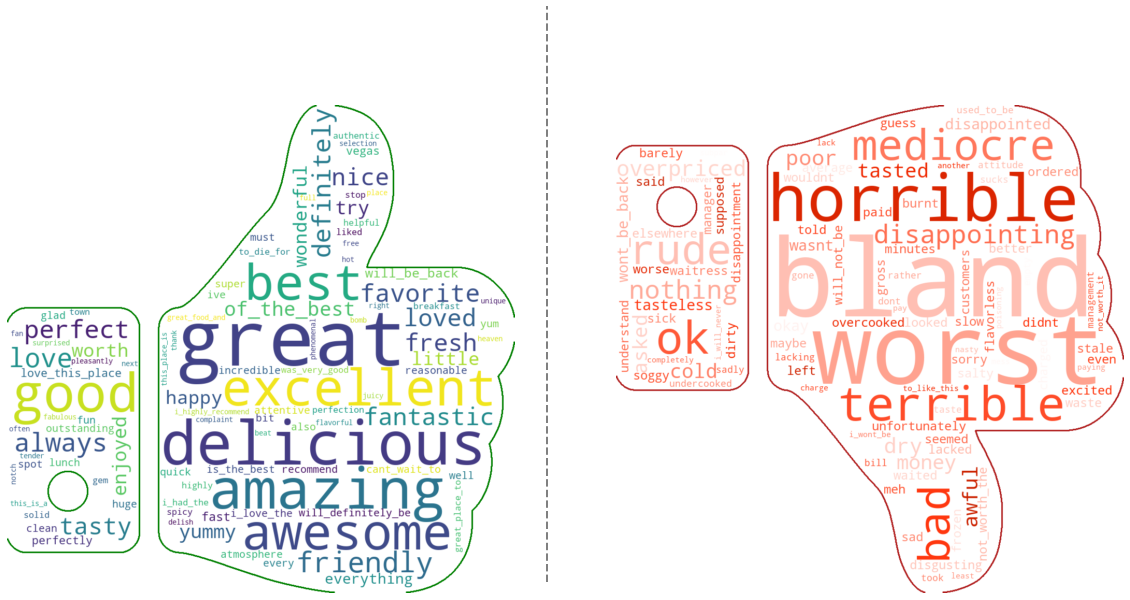

In [123]:
# Create a WordCloud for better visualization
# Read in the masks to be used when plotting the word clouds
pos_mask = np.array(Image.open("gs://sitinazihah-bucket/image/thumbspos.png"))
neg_mask = np.array(Image.open("gs://sitinazihah-bucket/image/thumbsdown.png"))


# Generate the word cloud for the positive reviews
d1 = {}
for a, x in pos.values:
    d1[a] = x
    

wordcloud = WordCloud(width=1600, height=800, max_words=100, background_color="white", 
                      mask=pos_mask, contour_width=3, contour_color='green') \
                      .generate_from_frequencies(frequencies=d1)


# Generate the word cloud for the negative reviews
d2 = {}
for a, x in pos.values:
    d2[a] = -x

    
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(40, 100)


wordcloud2 = WordCloud(width=1600, height=800, max_words=100, background_color="white", 
                       mask=neg_mask, contour_width=3, contour_color='firebrick') \
                      .generate_from_frequencies(frequencies=d2) \
                      .recolor(color_func = red_color_func)


# Plot the wordclouds side by side
fig = plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")

line = plt.Line2D((.5,.5),(.3,.8), color="grey", linewidth=2, linestyle = '--')
fig.add_artist(line)

plt.show()

#### Discussion

The Word Cloud on the left highlights the top unigrams/ trigrams used to express positive sentiment, while the one on the right highlights the top unigrams/ trigrams used to express negative sentiment. Looking at the terms that appear the biggest, we could tell that our model has done a good job in segregating the general words associated with positive/ negative sentiments. To illustrate, positive words such as great, excellent, amazing, awesome, etc. are correctly segregated as the words that drive positive sentiment the most, and negative words such as worst, terrible, horrible, mediocre, bad, etc. are correctly segregated as the words that drive negative sentiment the most. 

If we zoom in further to look at the factors that drive these sentiments, we can see that for restaurants in general, the most positive terms include 'delicious', 'fresh', 'authentic', 'selection', 'helpful', 'friendly', 'attentive', 'atmosphere'. This implies that among the factors that ensure the highest level of customer satisfaction are good quality, freshly prepared food as expected. Apart from that, majority of the positive reviews also regard having authentic food as important, alongside having a good selection of menu. Next, customers in general also place a high emphasis on good customer service, generally leaving good reviews when the staff are helpful/ friendly/ attentive. 

In addition, good atmosphere of the restaurant is also one of the most important drivers of positive sentiment. Looking at some of the trigrams that surfaced on the left plot, we could see terms such as "will be back", "of the best" and "can't wait to", suggesting that customers in general would leave positive reviews when it is one of the best experiences that they had. The terms also suggest that good restaurants in general would receive repeat customers.

If we now shift our attention to the plot on the right and zoom in further to look at the aspects that drive negative sentiment the most, we could see terms such as 'bland', 'flavorless', 'burnt', 'stale', 'dry', 'frozen', 'soggy', 'undercooked', 'overcooked'. From here alone, we could see that there are way more terms related to the taste of food in the negative reviews, than there are in positive reviews, suggesting that there are various aspects of food that can drive customers away, such as the taste itself, the texture of the food, the temperature of the food, and how the food is cooked. Besides the food itself, one of the factors that led customers to leave negative reviews has to do with the price of food - terms such as 'bill', 'overpriced', 'not worth it' suggest that customers are also repelled by overpriced food, or pricey food that do not meet their expectations. 

Terms such as 'dirty' and 'gross' suggest that the bad conditions of the restaurant would also drive customers to write negative reviews. Another aspect is of course, the customer service provided by the restaurants - terms such as 'rude', 'manager', 'management', 'waitress', 'attitude' suggest that customers in general regard restaurants negatively when the staff are rude with a bad attitude, and if the restaurants are poorly managed. Waiting time is another aspect that is viewed highly by customers - most negative reviews are driven by the long waiting time, given that customers in general used words such as 'slow' and 'waited' a lot in the negative reviews. Interestingly, one of the top trigrams that surfaced, i.e. 'used to be' suggests that a lot of customers get disappointed and leave negative reviews when certain aspects of the restaurant deteriorate over time and no longer match their expectations. Of course, terms such as 'I will never', 'will not be' and 'I won't be' suggest that restaurants receiving negative reviews are unlikely to receive repeat customers.

These are of course very much aligned with what we would expect when we go to restaurants, and they are rather general, as we are looking at all useful reviews left on all restaurant businesses, regardless of the type of the restaurant. Nonetheless, the insights gained are still very useful, and can serve as a general guideline for restaurants to follow, if they want to receive good reviews and ensure their business longevity through a positive exposure/ repeat customers. In section 5, we will dive in further and select more specific restaurant types, to extract more specific aspects of restaurants that customers find the most appealing/ appalling.

<br>

## 4) Exploring Yelp User Patterns - Elites as Potential Influencers

Now that we have explored the review dataset, it is time to analyze the users of Yelp, to find interesting patterns and insights that may be particularly useful for business owners as potential marketing data. Yelp is not only a platform whereby registered users can leave reviews on registered businesses. It is also akin to a social media platform, whereby the users can receive votes/ send votes, have friends and fans, and can even be conferred the 'elite' status by Yelp. According to Yelp [5], elite-worthiness is based on a number of things, including well-written reviews, high quality photos, a detailed personal profile, and a history of playing well with others.

Most businesses are on Yelp to improve their visibility and to attract more customers to their businesses, especially via (hopefully) positive reviews that their customers leave on the Yelp website. One of the techniques that are widely used to sell products/ attract customers now is through targeted marketing using "social media influencers". Businesses are particularly identifying social media influencers through social media platforms such as Instagram, Facebook, etc. and are paying them to review their products/ businesses. This targeted marketing is actually based on a concept from the social network theory of power law degree distributions. Below, we explore this concept in more depth to identify potential marketing opportunities for businesses.


### 4.1 Degree Centrality and Power-Law Degree  Distributions - Background 
The degree of a vertex/ node in a network is the total number of links/ edges attached to the vertex. There are of course, 2 variances of degree, i.e. in-degree and out-degree, indicated by whether the links are pointing to the vertex/ pointing from the vertex respectively. [6] Social network scientists have found interesting degree distribution patterns in real-world social networks - they found that most of them are scale-free networks which means that the degree distributions follow a power law. The equation below explains the scale invariant property of the power law:

$f(ax) = a^\bigtriangleup f(x)$

If we were to multiply our input by a certain constant, we can still express the results as a function of $x$ times this constant to a certain power.

When a network's degree distribution follows the power-law, if we look at its normal scale plot and log-log scale plot of degree distribution, they will look like below respectively:

<img src="image/degreeplot.png" width="300" height="300" />

<img src="image/loglog.png" width="300" height="300" />

The images above show the degree distribution for the Youtube social network captured at a particular time where there are about 1.13mil Youtube users with 2.99mil edges (indicating Youtube following) between them. From the first plot, we can see that we have this extreme distribution whereby majority of the users have very few to no followers, but there are still a handful of individuals/ Youtube accounts that are extremely popular (with a lot of followings). Looking at the second plot, we can fit a straight line to the log-log plot of the degree distribution, with the equation:

$log p_d = c - \alpha log d$

whereby $d$ is the degree, $p_d$ is the proportion of nodes with degree $d$, $c$ is the intercept and $\alpha$ is the slope of the line. If we exponentiate both sides, we get:

$p_d = cd^{-\alpha}$

which means that we have a power law. Now that we know how the degree distribution for a scale-free network (following power law) looks like, we can try to understand the impact that it has on social processes. As observed in the plots above, we can see that scale-free networks have very few nodes that are highly connected with others (those with really high degrees) - these are the "influencers" in our network, i.e. those that can influence information spread throughout the network due to their high degree centrality (degree centrality [7] measures how central the position of a node is, with respect to its degree - higher degree, higher centrality). 

This is then linked to the concept of diffusion in social network theory - diffusion is inevitable in scale-free networks, be it diffusion of information/ pathogens, etc.. One of the implications of diffusion in scale-free networks is viral/ targeted marketing. This is when businesses target the "influencers" directly and rely on them to diffuse information to others via their large pool of connections. One of the benefits of viral marketing is again related to the degree distribution in the network - in a scale-free network, "influencers" are connected to many other nodes so information diffusion is fast, and on top of that, their connections (or they themselves) may also be connected to other influencers - this will dramatically reduce the average path length for which information flows throughout the network, making this marketing technique even more effective. 

Coming back to our Yelp user data, since Yelp also doubles up as a social media platform (since it enables users to connect with each other), we would like to identify if the user degree distribution does follow the power law and if it does, who are mostly the users with the very high degree distributions - are they the 'elites'? If so, there may be a viral marketing opportunity for businesses - they can target these 'elites' to share information about their businesses via the reviews that they write. 


### 4.2 Prepare Data for Analysis
We first perform several modifications to the user data, so that we can extract useful information required for our analysis. First, we define a function to determine whether or not a user is 'elite', because the 'elite' column in the dataframe lists the years for which a user is 'elite' - we just want to know if a user has been conferred the 'elite' title. Then, we apply the function using the udf function to our user dataframe, alongside another manipulation - instead of having separate columns for the numbers of different types of compliments received, we just want one column that sums all of the compliments received by the user. Below are the codes implemented and the first 10 rows of the resulting dataframe. 

In [13]:
# Define a function to enable creating a column that 
# highlights whether a user is elite or not
def determine_elite(elite):
    if 'None' in elite:
        return 'no'
    else:
        return 'yes'
    

is_elite = udf(lambda x: determine_elite(x))

# Create a "cleaner" version of user data by identifying whether or not a user is elite,
# and sum up the total compliments they receive rather than having them separately.
user_filtered = user.select("user_id", "friends", is_elite("elite"), "average_stars", "fans",  
                            "review_count", "compliment_cool", "compliment_cute", 
                            "compliment_funny", "compliment_hot", "compliment_list", 
                            "compliment_more", "compliment_note", "compliment_photos", 
                            "compliment_plain", "compliment_profile", "compliment_writer") \
                    .withColumnRenamed("<lambda>(elite)", "is_elite") \
                    .withColumn("total_compliment", col("compliment_cool") + col("compliment_cute") 
                                + col("compliment_funny") + col("compliment_hot") 
                                + col("compliment_list") + col("compliment_more") 
                                + col("compliment_note") + col("compliment_photos") 
                                + col("compliment_plain") + col("compliment_profile") 
                                + col("compliment_writer")) \
                    .drop("compliment_cool", "compliment_cute", "compliment_funny", "compliment_hot", 
                          "compliment_list", "compliment_more", "compliment_note", "compliment_photos", 
                          "compliment_plain", "compliment_profile", "compliment_writer")

# Have a look at the first 10 lines
user_filtered.show(10)

+--------------------+--------------------+--------+-------------+----+------------+----------------+
|             user_id|             friends|is_elite|average_stars|fans|review_count|total_compliment|
+--------------------+--------------------+--------+-------------+----+------------+----------------+
|EZmocAborM6z66rTz...|[iJg9ekPzF9lkMuvj...|     yes|         3.59| 298|         761|           22714|
|myql3o3x22_ygECb8...|[r2UUCzGxqI6WPsiW...|      no|         4.29|  34|          80|             640|
|FIk4lQQu1eTe2EpzQ...|[qewG3X2O4X6JKskx...|     yes|         4.15|  48|         841|             178|
|ojovtd9c8GIeDiB8e...|[AIhfuFmX62k7a22g...|     yes|         3.82|  28|         376|             215|
|uVEoZmmL9yK0NMgad...|[bvZkBCY-AvCsxRjd...|      no|         2.97|   2|          28|               0|
|TprC8sujz8Mkwuomr...|[YZ4dz1QD-muThmGM...|     yes|         3.76|   9|         194|              86|
|De-dImXf-TOFWWPTU...|[Hze9r06sEb-EXEFP...|     yes|         4.04|   4|         11

In [13]:
print("There are altogether", user_filtered.count() ,"rows of user data.")

There are altogether 1029432 rows of user data.


### 4.3 Get the Degree Distribution of Yelp Users
To plot the degree distribution of Yelp users, we are first going to build a "friendship" graphframe using the 'friends' column of the user dataframe to identify edges between the users, with an edge existing if a user is listed as another user's friend. The vertices will consist of all unique user ids including user ids in the 'friends' column. Then, we are going to calculate the in-degrees for all of the unique user ids, and plot the in-degree distribution, to see if it follows the power law and thus, is a scale-free network.


#### 4.3.1 Build "friendship" graphframe
In the two code cells below, we define the friendship edges ('friendshipEdges') as well as the vertices ('userVerticesID') of the graphframe that we are going to build. Apart from that, one thing we noticed is that not all users with IDs in the 'userVerticesID' dataframe have their own line of records in the original user dataframe. This is because some of the user IDs that are listed as friends of a user may not have their own line of records. This is also the reason why we are looking at in-degree instead of degree - although friendship should be a mutual relationship, but because of the incomplete record of users, we have to look at tie directionality, as in-degree will not be equal to out-degree now. Taking just the degree can be misleading as degree here will be the sum of in-degree and out-degree and the incomplete record will distort the meaning of 'friendship' here. Thus, we are going to use in-degree as it implies the number of users that point to another user as their friend, which can be a proxy measure of popularity/ prominence. 

Thus, for the purpose of our next analysis, we are also going to create another dataframe called 'userVertices' in the second code cell below that only extracts users with complete records. 

In [15]:
# Find all friendship edges
# Here, we have to account for the fact that some of the users have no friends,
# and others may have more than 1 friend 
friendshipEdges = user_filtered.select("user_id", "friends") \
                               .rdd.flatMap(lambda r: [{'src':r[0], 'dst':None} if (r[1][0]=='None') \
                                                        else {'src':r[0], 'dst':friend} for friend in r[1]]) \
                               .toDF()

# Next, we exclude all the edges that point to 'None'
friendshipEdges = friendshipEdges.filter("src!='None' AND dst!='None'")
friendshipEdges.createOrReplaceTempView("friendshipEdges")
friendshipEdges.cache()

DataFrame[dst: string, src: string]

In [16]:
# Create a dataframe to contain all user vertices
userVerticesID = spark.sql("select distinct id from (select distinct src as id from friendshipEdges union all select distinct dst as id from friendshipEdges)")
userVerticesID.cache()

# Since not all users in the above dataframe have their own records in the user dataset,
# here we extract only those with records for our analysis later (that requires their other details).
# However, for the graphframe that we are going to build, we are going to use the df above.
userVertices = userVerticesID.join(user_filtered, [userVerticesID.id == user_filtered.user_id], 
                                   how = 'inner') \
                             .select(userVerticesID.id, user_filtered.is_elite, 
                                     user_filtered.average_stars, user_filtered.fans, 
                                     user_filtered.review_count, user_filtered.total_compliment)
userVertices.cache()

DataFrame[id: string, is_elite: string, average_stars: double, fans: bigint, review_count: bigint, total_compliment: bigint]

In [14]:
print("Total user IDs found via the friendship ties are", userVerticesID.count())
print("A subset of the above dataframe with only users having \
complete records in the user dataset amounts to", userVertices.count(), "users.")

Total user IDs found via the friendship ties are 6745841
A subset of the above dataframe with only users having complete records in the user dataset amounts to 577770 users.


It is important to note that the numbers above exclude isolates, i.e. users with no friendship connections. Below, we generate the friendship graph from the vertices and edges created earlier, and we summarize the number of vertices and edges. 

In [17]:
# Create a friendship graph 
friendshipGraph = GraphFrame(userVerticesID, friendshipEdges)

print("Number of Vertices =", friendshipGraph.vertices.count())
print("Number of Edges =", friendshipGraph.edges.count())

Number of Vertices = 6745841
Number of Edges = 29271414


#### 4.3.2 Calculate the in-degrees for the users from the graphframe, and sort them before looking at the first 5 lines

In [18]:
# Get the inDegrees corresponding to each user ID
user_degree = friendshipGraph.inDegrees.sort('inDegree', ascending=False)

# Have a look at the first 5 lines
user_degree.show(5, False)

+----------------------+--------+
|id                    |inDegree|
+----------------------+--------+
|8DEyKVyplnOcSKx39vatbg|4699    |
|yLW8OrR8Ns4X1oXJmkKYgg|4361    |
|qVc8ODYU5SZjKXVBgXdI7w|4032    |
|7PtUMFXJKOqGxblr_jCgxw|3983    |
|iLjMdZi0Tm7DQxX1C1_2dg|3834    |
+----------------------+--------+
only showing top 5 rows



#### 4.3.3 Plot the in-degree distribution for users of Yelp on a normal scale and on a log-log scale, to see the pattern of the distribution

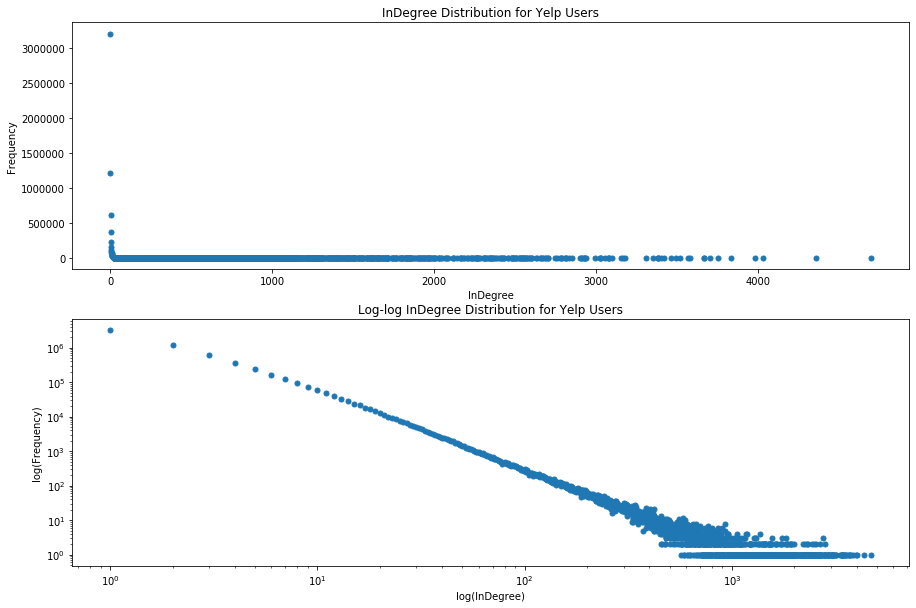

In [20]:
# Create a dataframe to enable plotting of the inDegree distribution for the users
user_degree_frequency = friendshipGraph.inDegrees.groupBy('inDegree') \
                                       .agg(func.count('id').alias('frequency'))
user_degree_plot = user_degree_frequency.toPandas()

# Plot the inDegree distribution
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(user_degree_plot['inDegree'], user_degree_plot['frequency'], ".", markersize=10)
plt.xlabel("InDegree")
plt.ylabel("Frequency")
plt.title("InDegree Distribution for Yelp Users")
        
# Plot the log-log version of inDegree distribution
plt.subplot(2,1,2)
plt.loglog(user_degree_plot['inDegree'], user_degree_plot['frequency'], ".", markersize=10)
plt.xlabel("log(InDegree)")
plt.ylabel("log(Frequency)")
plt.title("Log-log InDegree Distribution for Yelp Users")
plt.show()

#### Discussion
From the plots above, it is clear that the social network pattern for the users of Yelp follows the power law. We would be able to fit a straight line on the log-log plot, similar to the example provided in section 4.1. This implies that the network is a scale-free network, which is in line with our expectation, given that Yelp is akin to a social media platform that allows users to be connected and form social ties, instead of just a review platform. 

From the plots above, we can see that this scale-free network of Yelp users has very few users that are highly connected with others (with really high in-degree centrality), while most users are only connected with very few others. These highly connected users are the potential "influencers" on the Yelp platform, i.e. those that can shorten information spread across the network rather dramatically, given their large pool of connections. Going back to the diffusion concept in social network theory (explained in section 4.1), businesses should see this pattern as a possible opportunity for viral/ targeted marketing by targeting these "influencers" directly and relying on them to increase the business exposure. 

However, given the large number of users on Yelp, it may not be as simple to identify these influencers, except if they are also 'elites', as the 'elites' on Yelp are given a colorful Elite badge on their Yelp profile [5]. In fact, those that have been 'elites' for 5 years would also receive a gold elite badge; after 10 years, they would receive a black elite badge. Not only that, Yelp itself also occasionally organizes events hosting local businesses and the 'elites' in the same community [5]. This would further increase the chance of business owners to meet the 'elites' and potentially strike marketing deals with them, i.e. getting them to share information about their businesses via the reviews that they write.

Thus, in the next section, we try to compare some statistics between the 'elites' and 'non-elites', to see if it is possible to conjecture that most of the "influencers" in the plots above are also 'elites'. It is not easy to segregate completely and claim that indeed, all users with the large number of connections are 'elites', as the 'elite' status is conferred to a user based on different factors, not only their number of connections. Thus, there may be users with a large number of connections but are still not conferred the 'elite' title by Yelp, and there would also be 'elites' that have not so many connections, but they may be identified by Yelp as worthy of the 'elite' status from their other contributions. Thus, we are not going to establish any causality, but rather try to spot some correlations between being an 'elite' and having larger "influence" throughout the network in general, compared to the 'non-elites'. 

### 4.4 Compare Some Basic Statistics and the Distributions of Features between the 'elites' and 'non-elites' 
As reported earlier, we are going to compare the 'elites' to the 'non-elites', to see if we can establish any difference between them, and if there is an observable distinction in terms of their general "influence" in the Yelp network.

#### 4.4.1 Compare Basic Statistics of the 'elites' to 'non-elites'
First, we are going to separate the records into two dataframes - one for the 'elites' and another one for the 'non-elites'. Then, we are going to use the describe() function to have a look at some summary statistics across the features for both, the 'elites' and the 'non-elites'.

In [21]:
# Create a dataframe to contain all the user details alongside their indegrees
user_merged = user_degree.join(userVertices, [user_degree.id == userVertices.id], how = 'inner') \
                         .select(user_degree.id, user_degree.inDegree, userVertices.is_elite, 
                                 userVertices.average_stars, userVertices.fans, 
                                 userVertices.review_count, userVertices.total_compliment)
 
    
# Separate into elite and non-elite dataframes
elite_user = user_merged.filter("is_elite == 'yes'")
non_elite_user = user_merged.filter("is_elite == 'no'")


# Use desribe to view some basic statistics to compare the elites to the non-elites
describe_elite = elite_user.describe('inDegree', 'review_count', 'average_stars', 
                                     'fans', 'total_compliment')
describe_non_elite = non_elite_user.describe('inDegree', 'review_count', 'average_stars', 
                                             'fans', 'total_compliment')


# Print the summary of the description for both elites and non-elites
print("Below are some of the basic statistics for the elite users:")
describe_elite.show()
print("Below are some of the basic statistics for the non-elite users:")
describe_non_elite.show()

Below are some of the basic statistics for the elite users:
+-------+-----------------+------------------+------------------+------------------+-----------------+
|summary|         inDegree|      review_count|     average_stars|              fans| total_compliment|
+-------+-----------------+------------------+------------------+------------------+-----------------+
|  count|            49217|             49217|             49217|             49217|            49217|
|   mean|76.87075603957982|235.70083507731067|3.8166919966678217|22.331734969624318|385.0564235934738|
| stddev| 188.134895118799| 269.8255100956923|0.3070067024152586| 57.39547780215914|2161.663956708865|
|    min|                1|                 1|              2.08|                 0|                0|
|    max|             4699|             11284|               5.0|              4691|           163353|
+-------+-----------------+------------------+------------------+------------------+-----------------+

Below are so

#### Discussion
From the table above, we can see that out of the 441,419 records that we are analyzing, only about 11% (49,217 users) consists of the 'elites', while the remaining 392,202 consists of the 'non-elites'. If we look at the statistics for in-degree across these two groups, it is clear that the average in-degree for the 'elites', i.e. the average number of users pointing to the 'elites' as their friend is much higher (almost 10 times bigger) than the average in-degree for the 'non-elites'. However, in terms of the standard deviation for in-degree centrality of the 'elites', it is much higher than that for the 'non-elites', which implies that there is a larger variation in terms of the number of connections for the 'elites' compared to the 'non-elites'. The 'elites' have a larger number of maximum in-degree compared to the 'non-elites', which matches our expectation, but the maximum number for the 'non-elites' is not that low either, corroborating our earlier suggestion that there could be 'non-elites' with a large number of connections but are still not conferred the 'elite' title by Yelp, as number of connections isn't the only factor being looked at when deciding on who gets the title. Overall, these observations suggest that there is an observable difference between the two groups in terms of their in-degree, and these statistics suggest that the 'elites' seem to be more well-connected than the 'non-elites', on average. 

Looking at the count of reviews written by the two groups, again we observe a similar pattern as in the case for in-degree. The 'elites' on average write about 235 reviews per person, which is about 11 times more than the number for the 'non-elites'. However, again the disparity is larger for the 'elite' group with a standard deviation of about 270 reviews compared to the 46 observed for the 'non-elite' group. Looking at the maximum number of reviews written by a user/ users from the 'elite' group, we could see that this number is almost twice the number of maximum reviews written by a member/ members from the 'non-elite' group. These observations imply that in terms of writing reviews, the 'elites' are certainly more diligent than the 'non-elites' on average.

Next, looking at the average star ratings allocated, we could not really see a stark difference between the two groups, suggesting that there is no general tendency across these two groups to allocate a certain rating when writing reviews, which is as expected. The average of the average star rating across both groups hover around 3.82 stars, but the 'elites' generally seem to give ratings that are within a smaller range compared to the 'non-elites'. 

Another good measure of "influence" is definitely the number of fans that a user has. On average, an 'elite' has about 22 fans, which is about 22 times larger than the average number of fans that 'non-elites' have. Again, the standard deviation for this measure is also larger for the 'elites', implying large variation within the group. Looking at the maximum number of fans that a user/ users have across these two groups, the figure for the 'elites' is close to 10 times more than the figure for the 'non-elites'. This suggests that the 'elites' on average have much more fans than the 'non-elites', implying that the former have more "influence" in the network than the latter, based on this measure. 

Finally, looking at the total compliments received across both groups, it is clear that the 'elites' received much more compliments (58 times more on average!) than their 'non-elites' counterparts, with about 385 total compliments received on average, compared to about 7 total compliments for the 'non-elites' on average. The deviations are again larger for the 'elites'. Interestingly, the user that received the maximum total number of compliments did not belong to the 'elite' group. However, we must keep in mind that there is a possibility of outliers existing across both groups and measures such as minimum/ maximum numbers are susceptible to outliers. Nonetheless, from these observations, we can conjecture that on average, the 'elites' have more people reading/ looking at their content/ posts, and there are also much more users that acknowledge (through compliments) the content posted by the 'elites' than the 'non-elites', suggesting that the former on average, write better content/ have more exposure on Yelp.

All measures (except the average star ratings) suggest that indeed, there is an observable difference between the two groups - despite being much smaller in number, the 'elites' seem to be much more "influential" (on average) in the Yelp user network, with much larger in-degree centrality numbers, much larger number of reviews written, much bigger fanbase, and they also receive a lot more compliments compared to the 'non-elites', on average. 

However, it is not a good idea to only look at the summary statistics when establishing correlations. Due to the large deviations observed (especially in the 'elite' group), it would only be fair if we look at the distributions of these measures across both groups, before concluding that indeed, the 'elites' seem to be more influential than the 'non-elites'. 

<br>

#### 4.4.2 Compare Distributions of Features between the 'elites' and 'non-elites'
Below, we have defined a general function that enables us to plot the measures described above for both groups, side-by-side. We have set the x-axis scale to a log scale, to enable clearer view. 

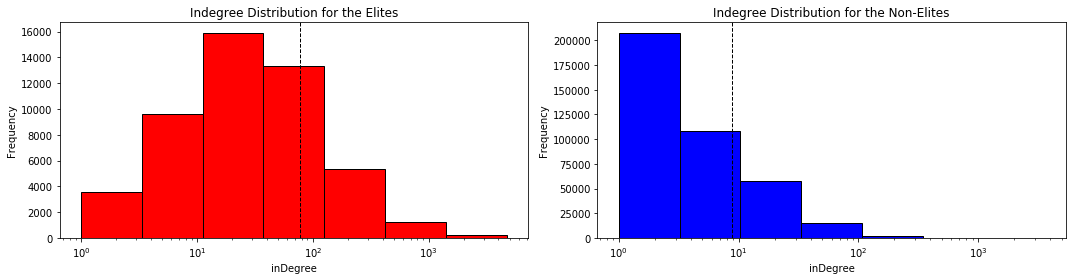

In [55]:
# Use toPandas() to ease plotting
elite_users = elite_user.toPandas()
non_elite_users = non_elite_user.toPandas()

# Define a general function to plot histograms
def plot_histogram(x, xlab, ylab, title_elite, title_non_elite):
    '''
    Given the parameters, plots two histograms side-by-side.
    '''
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    if elite_users[x].min() != 0:
        logbins = np.geomspace(elite_users[x].min(), elite_users[x].max(), 8)
    else:
        logbins = np.geomspace(0.000001, elite_users[x].max(), 8)
    plt.hist(elite_users[x], color = "red", bins = logbins, 
             edgecolor='black', linewidth=1)
    plt.axvline(elite_users[x].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xscale('log')
    plt.title(title_elite)
        
    plt.subplot(1,2,2)
    if non_elite_users[x].min() != 0:
        logbins1 = np.geomspace(non_elite_users[x].min(), non_elite_users[x].max(), 8)
    else:
        logbins1 = np.geomspace(0.000001, non_elite_users[x].max(), 8)
    plt.hist(non_elite_users[x], color = "blue", bins = logbins1, 
             edgecolor='black', linewidth=1)
    plt.axvline(non_elite_users[x].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xscale('log')
    plt.title(title_non_elite)
    plt.tight_layout()
    plt.show()


# Plot histogram for the degree distribution of the elites vs. the non-elites
plot_histogram("inDegree", "inDegree", "Frequency", "Indegree Distribution for the Elites",
               "Indegree Distribution for the Non-Elites")

The plots above compare the in-degree distributions across both groups. From these plots alone, we can tell that majority of the "influencers" observed in the plot from section 4.3.3 (those with in-degrees exceeding 100, i.e. $10^2$ in the above plots) are all mostly from the 'elite' group. The larger spread in the plot for the 'elites' compared to the 'non-elites' explains the larger standard deviation observed for the 'elite' group in section 4.4.1. We could see that the in-degree distribution for the 'elites' is more normally distributed, whereas the in-degree distribution for the 'non-elites' decays rather exponentially. This suggests that the elites do have members with smaller number of connections, but this number is well-balanced by the large number of members within the group with larger number of connections. However, for the 'non-elites', the distribution is not balanced - **majority of the 'non-elites' (about 76%) have less than 10 connections**, whereas for the 'elites', the opposite is true - about **73% of the 'elites' have more than 10 connections**. 

These plots strengthen our earlier suggestion that indeed, the 'elites' are much better connected than the 'non-elites' in general, and their positions in the Yelp user network is much more central (if we look at in-degree centrality), suggesting their potential in being "influencers". 

Next, we look at the distribution of review counts across these two groups, as plotted below:

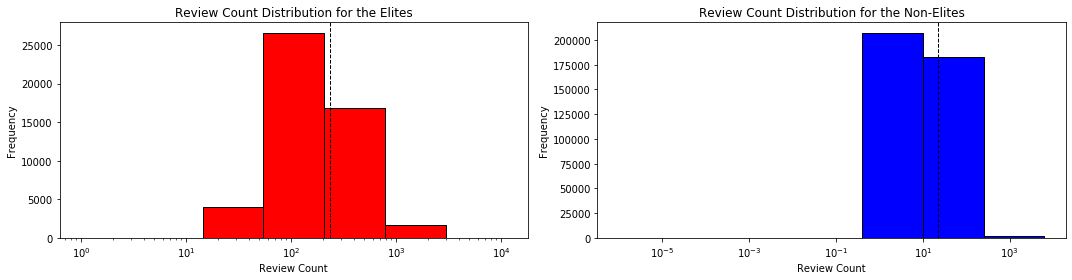

In [56]:
# Plot histogram for the review counts of the elites vs. the non-elites
plot_histogram("review_count", "Review Count", "Frequency", 
               "Review Count Distribution for the Elites",
               "Review Count Distribution for the Non-Elites")

Looking at these plots for the count of reviews across both groups, we could see a larger spread and a more normally distributed distribution for the 'elites', which explains the larger standard deviation for the 'elites' observed earlier. However, despite the larger spread, we could see that majority of the 'elites' (about 85% of them) write between 55 to 800 reviews, and there are still quite a number of them (about 2,000) writing between 800 to 3,000 reviews. On the contrary, more than half of the 'non-elites' have written below 10 reviews, and the rest have mostly written between 10 and 200 reviews, while very few have written above 200 reviews. If we look at the numbers in absolute terms, they may not seem so bad for the 'non-elites', but if we look at the ratio of those writing small number of reviews (less than 10) to those writing larger number of reviews (more than 10), the 'non-elites' recorded about a 1:1 ratio, but for the 'elites', we could barely see any of them writing less than 10 reviews on the plot above (they do exist, but the number is too small that they are not observable on this plot), suggesting that almost all of them have written more than 10 reviews.

These observations further corroborate our earlier suggestion that the 'elites' are more diligent than the 'non-elites' when it comes to writing reviews, and thus, have more of their opinions being circulated around the platform, compared to the 'non-elites'.

Next, we compare the distribution of the number of fans across these two groups, as below:

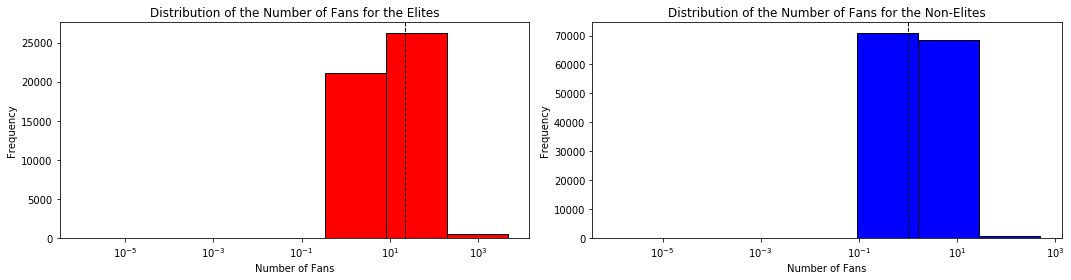

In [57]:
# Plot histogram for the fan counts of the elites vs. the non-elites
plot_histogram("fans", "Number of Fans", "Frequency", 
               "Distribution of the Number of Fans for the Elites",
               "Distribution of the Number of Fans for the Non-Elites")

Looking at the plots above, we could see that more than half of the 'non-elites' have either no fans or about 1 fan, and almost all 'non-elites' have below 30 fans, with the exception of very few having above 30 fans. However, only about 40% of the 'elites' have below 10 fans, with majority of them having between 10 to few hundred fans, and there are still remaining minorities with thousands of fans. Since the number of fans is an important indicator of the "influence" that a user has or the exposure that a user has in the Yelp network, this strongly implies that indeed, there is some correlation between being an 'elite' and having more fans ("influence").

Next, we look at the distributions of total compliments received across these two groups, as below:

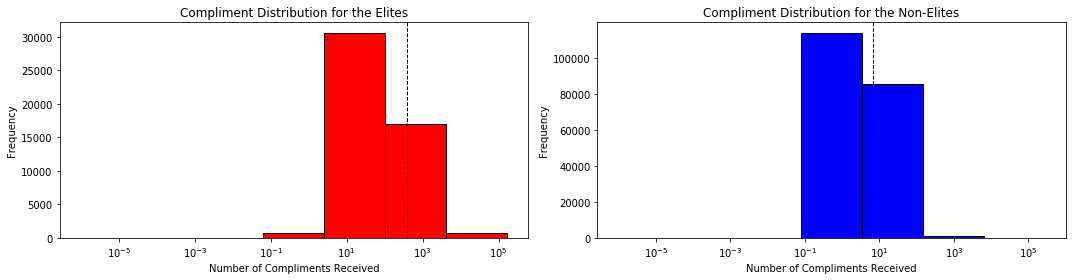

In [58]:
# Plot histogram for the distribution of total compliments for the elites vs. the non-elites
plot_histogram("total_compliment", "Number of Compliments Received", "Frequency", 
               "Compliment Distribution for the Elites",
               "Compliment Distribution for the Non-Elites")

Looking at the LHS plot above, about 33% of the 'elites' received between 100 to 6,000 total compliments, while about 61% of the remaining 'elites' received between (about)3 and 100 compliments. There are still quite a number of the 'elites' receiving very large number of compliments (in the range of thousands, some even exceeding 100k compliments). However, looking at the RHS plot, we can see that the distribution is somehow shifted to the left, with majority of them receiving less than (about) 3 compliments in total, and the remaining 'non-elites' mostly received below 100 plus compliments, with only very few receiving few thousand compliments. These observations suggest some correlation between being an 'elite' and receiving much more compliments. 

Combining all the observations from sections 4.4.1 and 4.4.2, we can safely say that indeed, on average, there is some general correlation between being an 'elite' and having more "influence"/ serving a more "useful"/ "helpful" purpose in the Yelp user network, with "influence"/ "usefulness"/ "helpfulness" being proxied by a combination of high in-degree centralities, large count of reviews, larger fan base, and higher number of compliments received. Of course, given that there are some disparities in terms of all these measures within the 'elite' group, we cannot blindly generalize this correlation to all 'elites'. 

However, given that majority of the results for the 'elites'(in terms of frequency distributions across the measures above) do seem to tend to the higher end of each scale **comparative** to the 'non-elites', we can establish that there is an observable difference between the two groups and in general, the 'elites' outperformed the 'non-elites' in all proxies of "influence"/ "usefulness"/ "helpfulness". This suggests that for the purpose of viral/ targeted marketing, businesses should consider targeting these "elites", especially those from their localities, to help spread information about their businesses faster, through the Yelp platform. This is because they are more likely to get a better "influencer" amongst the "elites", than the "non-elites" in general, given the results observed. 

At the same time, given the additional commitment from Yelp to connect these "elites" with the local business owners as mentioned in section 4.3.3, it makes it easier for these businesses to locate these "elites" and strike deals with them, in order to increase the exposure of the businesses. This is especially useful for new business owners, who are looking to market their business quickly, as the "influence" and connections that these "elites" have in general, would be able to shorten the spread of information within the Yelp community quite dramatically, especially for those with very high in-degree centralities. 


## 5) Going Deeper - Analysing Elites' Useful Reviews
Now that we have established that the 'elites' are generally more "influential" than the 'non-elites', we would like to go deeper by combining the findings from section 4 with the sentiment classifier built in section 3. To do this, we are going to build a sentiment classifier using the specifications from the best model found for two specific types of restaurant businesses, i.e. Fast Food restaurants and Italian restaurants, but we are only going to analyze reviews by the 'elites', with the aim of discovering aspects of these businesses that attract/ repel the 'elites' from visiting them. 

We hope to find specific positive/ negative aspects of these businesses according to the 'elites'. This would consequently serve as a useful analysis/ model to be performed by business owners, especially for business improvement purposes. This is because these 'elites' have been established to be generally well-connected, write many reviews, and have many other users complimenting their content and being their fans, suggesting that what they write should be generally useful and could potentially influence what other users think about these businesses. To get more specific results, we are going to look at two restaurant types separately, instead of looking at all restaurants. 


### 5.1 What Drives Elites' Positive/ Negative Sentiments for Fast Food Chains
In the next few code cells, we are going to implement exactly the same analysis that we have performed in section 3 using the best model found, i.e. SVM with SGD with the number of iterations set to 50 and regularization parameter set to 0.01. Since the steps are generally the same, we are not going to explain the implementation again here, but rather just comment on the results.

#### 5.1.1 Extract Useful Reviews by Elites for Fast Food Restaurants

In [15]:
# Get reviews by elites for fast food businesses

# Get useful reviews for all star ratings except 3 stars
review_useful = review.select('business_id', 'review_id', 'stars', 
                              'text', 'useful', 'user_id').where("useful >= 1 and stars != 3")

# Identify fast food businesses
business_fast_food = business.select('business_id', 'categories') \
                             .where(array_contains("categories", 'Fast Food'))

# Get all useful fast food reviews
fast_food_review = business_fast_food.join(review_useful, 
                                           [business_fast_food.business_id == review_useful.business_id], 
                                           how = 'inner') \
                                     .select(review_useful.business_id, review_useful.stars, 
                                             review_useful.text, review_useful.useful, 
                                             review_useful.review_id, review_useful.user_id)

# Get all useful fast food reviews by the elites
fast_food_elite = elite_user.join(fast_food_review,
                                 [elite_user.id == fast_food_review.user_id], how = 'inner') \
                            .select(fast_food_review.business_id, fast_food_review.stars, 
                                    fast_food_review.text, fast_food_review.useful, 
                                    fast_food_review.review_id, fast_food_review.user_id)

# Count the number of reviews that we will be analyzing
print("There are altogether", fast_food_elite.count(), "useful reviews submitted by \
the elites for fast food restaurants.")

There are altogether 12972 useful reviews submitted by the elites for fast food restaurants.


#### 5.1.2 Remove Punctuations, Convert Star Ratings to Sentiments, and Perform Tokenization 

In [ ]:
# Remove punctuations and convert star ratings to sentiments using the functions defined earlier
df_fast_food = fast_food_elite.select('review_id', punctuation_remover('text'), 
                                      sentiment_generator('stars'))

df_fast_food = df_fast_food.withColumnRenamed('<lambda>(text)', 'text') \
                           .withColumn('label', 
                                       df_fast_food['<lambda>(stars)'].cast(IntegerType())) \
                           .drop('<lambda>(stars)')


# Perform tokenization
tokenized_fast_food = tokenize.transform(df_fast_food)

#### 5.1.3 Train an SVM model on Trigrams only

In [27]:
# Add a trigram column to the tokenized_fast_food dataframe
trigram = NGram(inputCol = 'words', outputCol = 'trigram', n = 3)
add_trigram = trigram.transform(tokenized_fast_food)


# Count vectorizer (the TF part)
cv_trigram = CountVectorizer(inputCol='trigram', outputCol='tf_trigram')
cv_model_trigram = cv_trigram.fit(add_trigram)
cv_df_trigram = cv_model_trigram.transform(add_trigram)


# IDF to obtain TF-IDF
idf_trigram = IDF().setInputCol('tf_trigram').setOutputCol('tfidf_trigram')
tfidf_model_trigram = idf_trigram.fit(cv_df_trigram)
tfidf_df_trigram = tfidf_model_trigram.transform(cv_df_trigram)


# Split data into training and test datasets
split_train_test_trigram = tfidf_df_trigram.select(['tfidf_trigram', 'label']) \
                                           .randomSplit([0.8,0.2], seed = 42)
train_trigram = split_train_test_trigram[0].cache()
test_trigram = split_train_test_trigram[1].cache()


# Convert the train and test sets to LabeledPoint vectors
train_lp_trigram = train_trigram.rdd.map(lambda row: LabeledPoint(row[1], 
                                                                  MLLibVectors.fromML(row[0])))
test_lp_trigram = train_trigram.rdd.map(lambda row: LabeledPoint(row[1], 
                                                                 MLLibVectors.fromML(row[0])))


# Define the SVM model
numIterations = 50
regParam = 0.01
svm_trigram = SVMWithSGD.train(train_lp_trigram, numIterations, regParam=regParam)

#### 5.1.4 Select the Top 40 trigrams from the Model to Add to Unigrams 

In [17]:
# Create a df to contain the trigrams and their respective weights from the svm model
vocab_trigram = cv_model_trigram.vocabulary
weights_trigram = svm_trigram.weights.toArray()
svm_coeffs_df_trigram = pd.DataFrame({'trigram': vocab_trigram, 'weight': weights_trigram})

# Get the first 20 and last 20 trigrams 
top_trigram = svm_coeffs_df_trigram.sort_values('weight')['trigram'].values[:20]
bottom_trigram = svm_coeffs_df_trigram.sort_values('weight', ascending=False)['trigram'].values[:20]

# Join them in a list
trigram_list = list(top_trigram) + list(bottom_trigram)

# Have a look at the first 5 and last 5 entries of the trigram_list
print("The top 5 (positive) trigrams are:", trigram_list[-5:])
print("The bottom 5 (negative) trigrams are:", trigram_list[:5])

The top 5 (positive) trigrams are: ['with a smile', 'in n out', 'you can get', 'some of the', 'i like this']
The bottom 5 (negative) trigrams are: ['wont be back', 'i wont be', 'will not be', 'i should have', 'back to this']


#### 5.1.5 Replace the Selected Group of Words with their Trigram Version and Perform TF-IDF

In [31]:
# Replace the group of words that have been identified 
# as top trigrams with their trigram version using the function defined earlier.
trigram_df = udf(lambda x: replace_trigram(x))
trigram_df = tokenized_fast_food.select(trigram_df('text'), 'label') \
                                .withColumnRenamed('<lambda>(text)', 'text')

# Tokenize and remove stop words
tokenized_trigram = tokenize.transform(trigram_df)
tokenized_trigram = remove_stopwords.transform(tokenized_trigram)


# Use Count vectorizer and TF-IDF 
# Here, we use IDF separately as we already use CountVectorizer
cv = CountVectorizer(inputCol='words_no_sw', outputCol='tf')
cv_model = cv.fit(tokenized_trigram)
count_vectorized = cv_model.transform(tokenized_trigram)

idf = IDF().setInputCol('tf').setOutputCol('tfidf')
tfidf_model = idf.fit(count_vectorized)
tfidf_df = tfidf_model.transform(count_vectorized)

#### 5.1.6 Run another SVM model on the Combination of Unigrams and Top 40 Trigrams

In [33]:
# Split data into training and test datasets
split_train_test3 = tfidf_df.select(['tfidf', 'label']).randomSplit([0.8,0.2], seed = 42)
train3 = split_train_test3[0].cache()
test3 = split_train_test3[1].cache()


# Convert the train and test sets to LabeledPoint vectors
train_lp3 = train3.rdd.map(lambda row: LabeledPoint(row[1], MLLibVectors.fromML(row[0])))
test_lp3 = test3.rdd.map(lambda row: LabeledPoint(row[1], MLLibVectors.fromML(row[0])))


# Perform SVM with unigrams and trigrams
numIterations = 50
regParam = 0.01
svm3 = SVMWithSGD.train(train_lp3, numIterations, regParam=regParam)


# Perform prediction for model evaluation
test_prediction3 = test_lp3.map(lambda x: (float(svm3.predict(x.features)), x.label))
test_prediction_df3 = spark.createDataFrame(test_prediction3, ["prediction", "label"])


# Evaluate model performance
# Weighted F1 score
eval_f1 = MulticlassClassificationEvaluator(labelCol="label", 
                                            predictionCol="prediction", metricName="f1")
svm3_f1 = eval_f1.evaluate(test_prediction_df3)
print("F1 score: %.4f" % svm3_f1)

# AUROC
eval_auroc = BinaryClassificationEvaluator(labelCol="label", 
                                           rawPredictionCol="prediction", 
                                           metricName="areaUnderROC")
svm3_auroc = eval_auroc.evaluate(test_prediction_df3)
print("Area under ROC: %.4f" % svm3_auroc)

# Area under Precision Recall
eval_aupr = BinaryClassificationEvaluator(labelCol="label", 
                                          rawPredictionCol="prediction", 
                                          metricName="areaUnderPR")
svm3_aupr = eval_aupr.evaluate(test_prediction_df3)
print("Area under PR: %.4f" % svm3_aupr)

F1 score: 0.9083
Area under ROC: 0.8686
Area under PR: 0.9225


The F1 score, AUROC and AUPR scores all suggest that this model still performs very well, even on a much smaller subset of data (12,972 reviews here compared to 894,023 reviews in section 3). 

#### 5.1.7 Have a Look at the Unigrams / Trigrams that Define Positive / Negative Sentiment the Most

In [34]:
# Create a dataframe to contain the ngrams and their respective weights
vocab_final_elite = cv_model.vocabulary
weights_final_elite = svm3.weights.toArray()
svm3_coeffs_df = pd.DataFrame({'ngram': vocab_final_elite, 'weight': weights_final_elite})

In [35]:
neg = svm3_coeffs_df.sort_values('weight')

print("Below are the 25 unigrams / trigrams that contributed the most to the elites' negative reviews for fast food:")
neg.head(25)

Below are the 25 unigrams / trigrams that contributed the most to the elites' negative reviews for fast food:


,ngram,weight
698,worst,-0.203194
666,bland,-0.177495
1151,mediocre,-0.150843
238,ok,-0.146987
296,cold,-0.142441
1220,meh,-0.139673
1182,disappointing,-0.132141
386,disappointed,-0.129616
149,nothing,-0.124646
105,wasnt,-0.119284


In [36]:
pos = svm3_coeffs_df.sort_values('weight', ascending=False)

print("Below are the 25 unigrams / trigrams that contributed the most to the elites' positive reviews for fast food:")
pos.head(25)

Below are the 25 unigrams / trigrams that contributed the most to the elites' positive reviews for fast food:


,ngram,weight
15,great,0.262034
55,delicious,0.256421
2,good,0.211531
44,friendly,0.194840
37,love,0.193389
29,fresh,0.186461
18,always,0.182053
177,amazing,0.160925
215,perfect,0.150558
71,best,0.149925


#### 5.1.8 Create Word Clouds to Analyze the Aspects of the Fast Food Businesses Leading to Positive/ Negative Sentiments
As seen in the above dataframes, the first few words are still quite general as expected, as they would normally be adjectives that express general positive/ negative sentiments. Thus, to zoom further into the positive/ negative aspects of these businesses, we are going to skip the first 10 n-grams, and plot the next 120 terms.

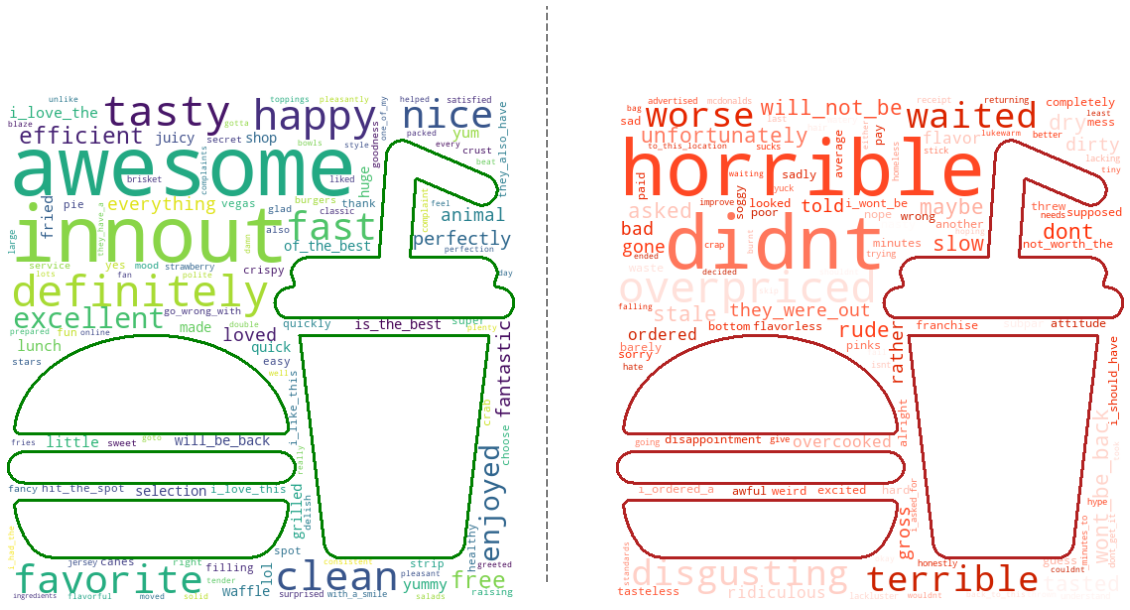

In [107]:
# Skip the first 10 ngrams as they are usually more general
pos = pos[10:]
neg = neg[10:]

# Read in the masks to be used when plotting the word clouds
pos_mask = np.array(Image.open("gs://sitinazihah-bucket/image/burger.png"))
neg_mask = np.array(Image.open("gs://sitinazihah-bucket/image/burger.png"))


# Generate the word cloud for the positive reviews
d1 = {}
for a, x in pos.values:
    d1[a] = x
    

wordcloud = WordCloud(width=1600, height=800, max_words=120, background_color="white", mask=pos_mask,
                      contour_width=3, contour_color='green').generate_from_frequencies(frequencies=d1)


# Generate the word cloud for the negative reviews
d2 = {}
for a, x in neg.values:
    d2[a] = -x

    
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(40, 100)


wordcloud2 = WordCloud(width=1600, height=800, max_words=120, background_color="white", mask=neg_mask,
                      contour_width=3, contour_color='firebrick').generate_from_frequencies(frequencies=d2) \
                      .recolor(color_func = red_color_func)


# Plot the wordclouds side by side
fig = plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")

line = plt.Line2D((.5,.5),(.3,.8), color="grey", linewidth=2, linestyle = '--')
fig.add_artist(line)

plt.show()

#### Discussion - What Aspects Do Elites Associate with a Positive/ Negative Experience at a Fast Food Restaurant?

<br>

1) **Fast and Efficient Service**
* Positive terms used:<font color=green> 'easy', 'quick', 'fast', 'efficient'</font>
* Negative terms used:<font color=red> 'waiting', 'waited', 'slow', 'minutes'</font>
* The 'elites' seem to place a large importance on the speed of service, leaving positive reviews when they are served quickly, and negative reviews when they are left to wait. This is a reasonable expectation since most people visit fast food restaurants for quick pickup food, and restaurants labelling their businesses as 'fast food' should live up to their names by providing quick service. 

2) **Large portions and Filling**
* Positive terms used:<font color=green> 'huge', 'large', 'filling', 'double'</font>
* Negative terms used:<font color=red> 'tiny'</font>
* Some of the words spotted suggest that the 'elites' look for big portions and food that are filling when they visit these fast food restaurants. The term 'tiny' is used to highlight negative sentiment, suggesting that they are unsatisfied with these restaurants when they serve small portions of food. This again aligns well with the general expectation when visiting fast food restaurants - we would normally look for quick fixes but still filling.

3) **Good Customer Service**
* Positive terms used:<font color=green> 'polite', 'with a smile', 'greeted'</font>
* Negative terms used:<font color=red> 'rude', 'attitude'</font>
* These terms are smaller in size compared to the terms related to fast service, however, the fact that they are there implies that the 'elites' are drawn to fast food chains with good customer service, that greet their customers politely and with a smile. They are turned away from restaurants with rude staff and those with attitude issues. This is again a fair expectation. Interestingly, here we do not see terms such as 'manager'/ 'management' appearing in the negative Word Cloud, unlike in section 3 for restaurants in general. This suggests that although there is some expectation of good service for fast food restaurants, customers are not motivated enough to complain or raise issues to the managers of these restaurants, which again makes sense as people are usually more motivated to raise complaints to managers in fancier restaurants, as these places usually place higher importance on customer satisfaction.

4) **Texture and Taste of Food**
* Positive terms used:<font color=green> 'tasty', 'yummy', 'crispy', 'juicy', 'tender', 'flavorful'</font>
* Negative terms used:<font color=red> 'soggy', 'stale', 'flavorless', 'overcooked', 'tasteless'</font>
* Another important aspect is of course the taste and texture of food - the terms above describe the taste and texture that the 'elites' associate with a positive/ negative experience. We can see that they generally refer to the meat items served. However, the terms are still quite general and we will see in the next section when we look at Italian restaurants (more fancy) that the vocabulary for taste expands so much more, suggesting that for fast food restaurants, there are some general taste and texture standards expected such as crispy, juicy and tender food being served, but the expectations are not too high. 

5) **Consistent Service that Matches Advertisements**
* Positive terms used:<font color=green> 'consistent'</font>
* Negative terms used:<font color=red> 'advertised', 'standards', 'hype'</font>
* The terms above suggest that the 'elites' look for consistency when visiting these restaurants, which makes sense as fast food restaurants have many branches (franchise) and these businesses should be consistent across all branches. Similarly, the 'elites' are drawn away from businesses that did not meet the standards advertised, or did not match the hype.

6) **Healthy Options**
* Positive terms used:<font color=green> 'healthy', 'salads'</font>
* Apparently, having healthy options in fast food restaurants is appealing to the 'elites'. This is an interesting finding, suggesting that people are still looking for a balanced diet when they visit fast food restaurants, which we know are not popular for serving healthy options. This is a good point to note for fast food business owners.

7) **Selection**
* Positive terms used:<font color=green> 'selection', 'they also have'</font>
* Negative terms used:<font color=red> 'they were out'</font>
* The 'elites' also seem to be happy with fast food restaurants that offer a large selection of menu, and they get irritated when the restaurants ran out of certain food items, which is a reasonable expectation to have.

8) **Online Option**
* Positive terms used:<font color=green> 'online'</font>
* Another interesting finding! The 'elites' seem to suggest that they resonate positively with the online service provided. Thus, fast food business owners should look to expand their businesses to the online platform, as people seem to appreciate this option. 

9) **Free Gifts**
* Positive terms used:<font color=green> 'free'</font>
* The size of this term is quite large in the Word Cloud above, suggesting that the 'elites' value the free items received. This is also one of the unique features of fast food restaurants that should be continued - we could typically see fast food businesses giving away free toys, etc. and although this may seem small, it is a good marketing technique. 

10) **Toppings and Ingredients**
* Positive terms used:<font color=green> 'toppings', 'ingredients'</font>
* The fact that these terms are in the positive vocabulary suggests that the 'elites' think highly of the topping options provided, and the ingredients used, suggesting that fast food business owners who wish to up their ante should consider focusing on improving the quality and selection range of these items. 

11) **Cleanliness**
* Positive terms used:<font color=green> 'clean'</font>
* Negative terms used:<font color=red> 'mess', 'dirty'</font>
* This is a rather general expectation, but given that they appear in both positive and negative Word Clouds suggest that cleanliness is certainly an important aspect that these fast food businesses should maintain. 

12) **Pricing**
* Negative terms used:<font color=red> 'overpriced'</font>
* Although there is only one term here, the size of the term in the negative Word Cloud is rather big, thus it is worth mentioning it here. However, the effect of pricing is not so large for fast food businesses, as there are no other words used to describe this issue negatively, compared to in Italian restaurants (more fancy) that we will see in the next section. This is of course intuitive since fast food restaurants in general serve food at quite reasonable prices compared to fancier places such as Italian restaurants. However, it is still an issue that is worth keeping in mind for fast food restaurant owners. 

13) **General - Food Type, Cooking Method, Most/ Least Favored Business Chain**
* Positive terms used:<font color=green> 'pie', 'burgers', 'waffle', 'brisket', 'fries', 'fried', 'grilled', 'in n out'</font>
* Negative terms used:<font color=red> 'mcdonalds'</font>
* Specific to this business type, we could see that the food and cooking types mentioned above contribute positively to the reviews written by the 'elites', suggesting that these businesses should continue to focus on preparing these items well. Interestingly, the fast food chain In-N-Out appeared very frequently in positive reviews, suggesting that this fast food chain may be the most favored by the 'elites', and McDonald's appeared a lot in the negative reviews, suggesting that this fast food chain may not be favored by the 'elites'. Given this insight, McDonald's should really step up their game and get in touch with these 'elites' to understand better why they are not doing as well in the eyes of the 'elites'. This is important as the 'elites' reviews are likely to be spread more and faster in the Yelp network, and this could potentially deteriorate McDonald's business. 

The 13 points above highlight the important aspects associated with the positive/ negative reviews written by the 'elites', when visiting fast food restaurants. We can say that all points highlighted by the 'elites' seem reasonable, which agrees with our expectation that the 'elites' in general write useful reviews, as complimented by other users. Importantly, as these 'elites' wrote phrases such as 'will be back' in positive reviews and 'won't be back' in negative reviews, fast food business owners should take these reviews seriously and work on improving their businesses as suggested by the 'elites', to avoid losing repeat customers, or even customers in general. 


### 5.2 What Drives Elites' Positive/ Negative Sentiments for Italian Restaurants
Next, we are going to implement exactly the same analysis as in section 5.1 again, but for Italian restaurants. We hope to be able to identify specific aspects of Italian restaurants that are appealing/ appalling to the 'elites'.

#### 5.2.1 Extract Useful Reviews by Elites for Italian Restaurants

In [21]:
# Get reviews by elites for businesses selling Italian food

# Identify Italian restaurants
business_italian = business.select('business_id', 'categories') \
                           .where(array_contains("categories", 'Italian'))

# Get all useful Italian food reviews
italian_review = business_italian.join(review_useful, 
                                       [business_italian.business_id == review_useful.business_id], 
                                       how = 'inner') \
                                     .select(review_useful.business_id, review_useful.stars, 
                                             review_useful.text, review_useful.useful, 
                                             review_useful.review_id, review_useful.user_id)

# Get all useful Italian food reviews by the elites
italian_elite = elite_user.join(italian_review,
                                [elite_user.id == italian_review.user_id], how = 'inner') \
                          .select(italian_review.business_id, italian_review.stars, 
                                  italian_review.text, italian_review.useful, 
                                  italian_review.review_id, italian_review.user_id)


# Count the number of reviews that we will be analyzing
print("There are altogether", italian_elite.count(), "useful reviews submitted by \
the elites for Italian restaurants.")

There are altogether 27025 useful reviews submitted by the elites for Italian restaurants.


#### 5.2.2 Remove Punctuations, Convert Star Ratings to Sentiments, and Perform Tokenization

In [ ]:
# Remove punctuations and convert star ratings to sentiments
df_italian = italian_elite.select('review_id', punctuation_remover('text'), sentiment_generator('stars'))

df_italian = df_italian.withColumnRenamed('<lambda>(text)', 'text') \
                       .withColumn('label', df_italian['<lambda>(stars)'].cast(IntegerType())) \
                       .drop('<lambda>(stars)')

# Perform tokenization
tokenized_italian = tokenize.transform(df_italian)

#### 5.2.3 Train an SVM model on Trigrams only

In [43]:
# Add a trigram column to the tokenized_fast_food dataframe
trigram = NGram(inputCol = 'words', outputCol = 'trigram', n = 3)
add_trigram = trigram.transform(tokenized_italian)


# Count vectorizer (the TF part)
cv_trigram = CountVectorizer(inputCol='trigram', outputCol='tf_trigram')
cv_model_trigram = cv_trigram.fit(add_trigram)
cv_df_trigram = cv_model_trigram.transform(add_trigram)


# IDF to obtain TF-IDF
idf_trigram = IDF().setInputCol('tf_trigram').setOutputCol('tfidf_trigram')
tfidf_model_trigram = idf_trigram.fit(cv_df_trigram)
tfidf_df_trigram = tfidf_model_trigram.transform(cv_df_trigram)


# Split data into training and test datasets
split_train_test_trigram1 = tfidf_df_trigram.select(['tfidf_trigram', 'label']) \
                                            .randomSplit([0.8,0.2], seed = 42)
train_trigram1 = split_train_test_trigram1[0].cache()
test_trigram1 = split_train_test_trigram1[1].cache()


# Convert the train and test sets to LabeledPoint vectors
train_lp_trigram1 = train_trigram1.rdd.map(lambda row: LabeledPoint(row[1], 
                                                                    MLLibVectors.fromML(row[0])))
test_lp_trigram1 = train_trigram1.rdd.map(lambda row: LabeledPoint(row[1], 
                                                                   MLLibVectors.fromML(row[0])))


# Define the SVM model
numIterations = 50
regParam = 0.01
svm_trigram1 = SVMWithSGD.train(train_lp_trigram1, numIterations, regParam=regParam)

#### 5.2.4 Select the Top 40 trigrams from the Model to Add to Unigrams 

In [23]:
# Create a df to contain the trigrams and their respective weights from the svm model
vocab_trigram = cv_model_trigram.vocabulary
weights_trigram = svm_trigram.weights.toArray()
svm_coeffs_df_trigram = pd.DataFrame({'trigram': vocab_trigram, 'weight': weights_trigram})

# Get the first 20 and last 20 trigrams
top_trigram = svm_coeffs_df_trigram.sort_values('weight')['trigram'].values[:20]
bottom_trigram = svm_coeffs_df_trigram.sort_values('weight', ascending=False)['trigram'].values[:20]

# Join them together in a list
trigram_list = list(top_trigram) + list(bottom_trigram)

# Have a look at the first 5 and last 5 entries of the trigram_list
print("The top 5 (positive) trigrams are:", trigram_list[-5:])
print("The bottom 5 (negative) trigrams are:", trigram_list[:5])

The top 5 (positive) trigrams are: ['for  ', 'if you are', 'was a little', ' i was', 'to come out']
The bottom 5 (negative) trigrams are: ['in love with', 'have to wait', 'and we had', 'seems to be', 'was delicious ']


#### 5.2.5 Replace the Selected Group of Words with their Trigram Version and Perform TF-IDF

In [47]:
# Use the function defined earlier to replace the group of words that have 
# been identified as top trigrams with their trigram version.
trigram_df = udf(lambda x: replace_trigram(x))
trigram_df = tokenized_italian.select(trigram_df('text'), 'label') \
                              .withColumnRenamed('<lambda>(text)', 'text')

# Tokenize and remove stop words
tokenized_trigram = tokenize.transform(trigram_df)
tokenized_trigram = remove_stopwords.transform(tokenized_trigram)


# Use Count vectorizer and TF-IDF 
# Here, we use IDF separately as we already use CountVectorizer
cv = CountVectorizer(inputCol='words_no_sw', outputCol='tf')
cv_model = cv.fit(tokenized_trigram)
count_vectorized = cv_model.transform(tokenized_trigram)

idf = IDF().setInputCol('tf').setOutputCol('tfidf')
tfidf_model = idf.fit(count_vectorized)
tfidf_df = tfidf_model.transform(count_vectorized)

#### 5.2.6 Run another SVM model on the Combination of Unigrams and Top 40 Trigrams

In [49]:
# Split data into training and test datasets
split_train_test4 = tfidf_df.select(['tfidf', 'label']).randomSplit([0.8,0.2], seed = 42)
train4 = split_train_test4[0].cache()
test4 = split_train_test4[1].cache()


# Convert the train and test sets to LabeledPoint vectors
train_lp4 = train4.rdd.map(lambda row: LabeledPoint(row[1], MLLibVectors.fromML(row[0])))
test_lp4 = test4.rdd.map(lambda row: LabeledPoint(row[1], MLLibVectors.fromML(row[0])))


# Perform SVM with unigrams and trigrams
numIterations = 50
regParam = 0.01
svm4 = SVMWithSGD.train(train_lp4, numIterations, regParam=regParam)


# Perform prediction for model evaluation
test_prediction4 = test_lp4.map(lambda x: (float(svm4.predict(x.features)), x.label))
test_prediction_df4 = spark.createDataFrame(test_prediction4, ["prediction", "label"])


# Evaluate model performance
# Weighted F1 score
eval_f1 = MulticlassClassificationEvaluator(labelCol="label", 
                                            predictionCol="prediction", 
                                            metricName="f1")
svm4_f1 = eval_f1.evaluate(test_prediction_df4)
print("F1 score: %.4f" % svm4_f1)

# AUROC
eval_auroc = BinaryClassificationEvaluator(labelCol="label", 
                                           rawPredictionCol="prediction", 
                                           metricName="areaUnderROC")
svm4_auroc = eval_auroc.evaluate(test_prediction_df4)
print("Area under ROC: %.4f" % svm4_auroc)

# Area under Precision Recall
eval_aupr = BinaryClassificationEvaluator(labelCol="label", 
                                          rawPredictionCol="prediction", 
                                          metricName="areaUnderPR")
svm4_aupr = eval_aupr.evaluate(test_prediction_df4)
print("Area under PR: %.4f" % svm4_aupr)

F1 score: 0.9392
Area under ROC: 0.8814
Area under PR: 0.9508


The F1 score, AUROC and AUPR scores all suggest that this model performs very well, again on a much smaller subset of data (27,025 reviews here compared to 894,023 reviews in section 3). 

#### 5.2.7 Have a Look at the Unigrams / Trigrams that Define Positive / Negative Sentiment the Most

In [50]:
# Create a dataframe to contain the ngrams and their respective weights
vocab_italian = cv_model.vocabulary
weights_italian = svm4.weights.toArray()
svm4_coeffs_df = pd.DataFrame({'ngram': vocab_italian, 'weight': weights_italian})

In [51]:
neg1 = svm4_coeffs_df.sort_values('weight')

print("Below are the 25 unigrams / trigrams that contributed the most to the elites' negative reviews for Italian food:")
neg1.head(25)

Below are the 25 unigrams / trigrams that contributed the most to the elites' negative reviews for Italian food:


,ngram,weight
559,bland,-0.274896
69,better,-0.209725
939,mediocre,-0.206124
174,nothing,-0.201086
888,disappointing,-0.200964
1081,worst,-0.184471
293,ok,-0.180425
476,okay,-0.174227
562,dry,-0.163470
935,terrible,-0.159471


In [52]:
pos1 = svm4_coeffs_df.sort_values('weight', ascending=False)

print("Below are the 25 unigrams / trigrams that contributed the most to the elites' positive reviews for Italian food:")
pos1.head(25)

Below are the 25 unigrams / trigrams that contributed the most to the elites' positive reviews for Italian food:


,ngram,weight
6,great,0.309440
43,delicious,0.296265
83,perfect,0.251499
87,amazing,0.238135
127,excellent,0.231047
50,definitely,0.190680
153,loved,0.185245
110,favorite,0.184332
40,fresh,0.181878
42,love,0.174791


#### 5.2.8 Create Word Clouds to Analyze the Aspects of the Italian Restaurants Leading to Positive/ Negative Sentiments
Again, the above dataframes show that the first few words are still quite general as expected. Thus, to zoom further into the positive/ negative aspects of these businesses, we are again going to skip the first 10 n-grams, and plot the next 120 terms.

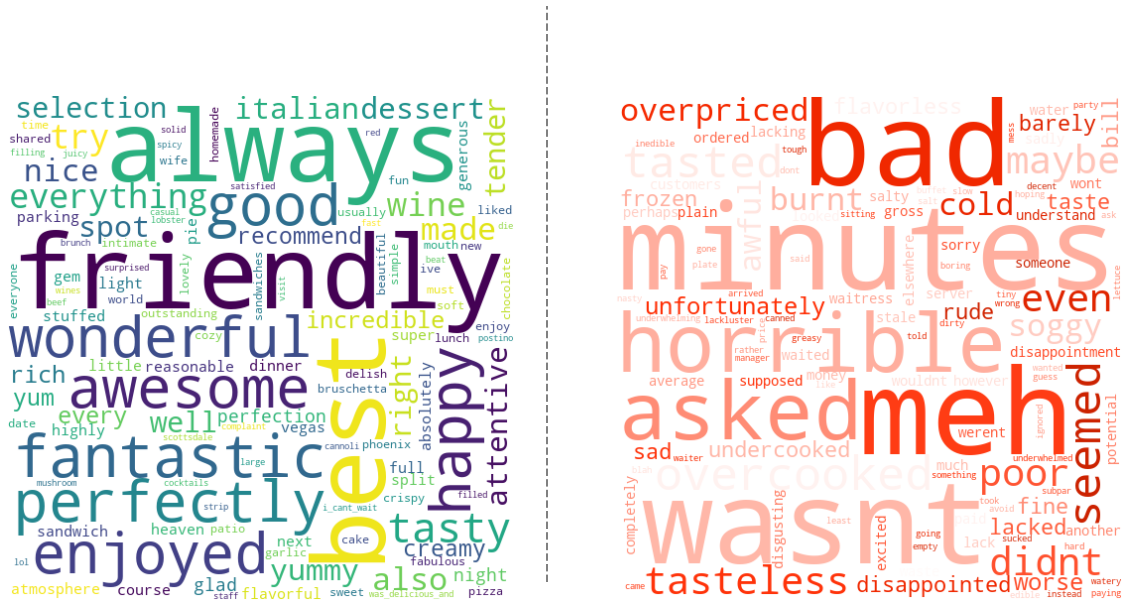

In [110]:
# Skip the first 10 ngrams as they are usually more general
pos1 = pos1[10:]
neg1 = neg1[10:]

# Read in the masks to be used when plotting the word clouds
pos_mask = np.array(Image.open("gs://sitinazihah-bucket/image/italian.png"))
neg_mask = np.array(Image.open("gs://sitinazihah-bucket/image/italian.png"))


# Generate the word cloud for the positive reviews
d1 = {}
for a, x in pos1.values:
    d1[a] = x
    

wordcloud = WordCloud(width=1600, height=800, max_words=120, background_color="white", mask=pos_mask,
                      contour_width=3, contour_color='green').generate_from_frequencies(frequencies=d1)


# Generate the word cloud for the negative reviews
d2 = {}
for a, x in neg1.values:
    d2[a] = -x

    
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(40, 100)


wordcloud2 = WordCloud(width=1600, height=800, max_words=120, background_color="white", mask=neg_mask,
                      contour_width=3, contour_color='firebrick').generate_from_frequencies(frequencies=d2) \
                      .recolor(color_func = red_color_func)


# Plot the wordclouds side by side
fig = plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")

line = plt.Line2D((.5,.5),(.3,.8), color="grey", linewidth=2, linestyle = '--')
fig.add_artist(line)

plt.show()

#### Discussion - What Aspects Do Elites Associate with a Positive/ Negative Experience at an Italian Restaurant?

<br>

1) **Atmosphere**
* Positive terms used:<font color=green> 'date', 'intimate', 'beautiful', 'cozy', 'patio', 'atmosphere'</font>
* Negative terms used:<font color=red> 'empty', 'plain'</font>
* The 'elites' seem to place a large importance on the place set up, unlike for fast food restaurants. Here, they leave negative reviews when the place is empty or plain, but complimented restaurants with beautiful and cozy set up. Terms like 'date' and 'intimate' suggest that this beautiful set up is expected as some of these restaurants' frequenters visit these places for a date, or for an intimate occasion, placing a huge importance on the atmosphere of the place. Interestingly, 'patio' appears quite a lot, suggesting that the 'elites' value Italian restaurants with a patio. This is of course another extra factor that makes the place even more cozy and creates a relaxed setting.

2) **Homemade Food and No Canned Food**
* Positive terms used:<font color=green> 'homemade'</font>
* Negative terms used:<font color=red> 'canned'</font>
* For Italian restaurants, the 'elites' seem to compliment restaurants with homemade food, and they expressed their dissatisfaction when restaurants served canned food (or food that tasted like canned food). This is completely understandable as one would place a higher expectation on food quality when visiting fancier restaurants such as Italian restaurants (in general), and thus would appreciate homemade food that tastes authentic rather than food that tastes like canned food that can be bought outside at a much cheaper price. 

3) **Pricing**
* Positive terms used:<font color=green> 'reasonable'</font>
* Negative terms used:<font color=red> 'overpriced', 'bill', 'price', 'money', 'paying'</font>
* Compared to the 'elites' reviews for fast food restaurants, the reviews for Italian restaurants seem to suggest that pricing is more of an issue here. There are many more negative words associated with the pricing of food, which is understandable as comparing Italian restaurants to fast food places, the former is much fancier than the latter and so, may set much higher prices. Some of the 'elites' highlighted reasonable prices, suggesting that some restaurants are able to set prices that match the quality of service/ food served, but there are also others that are deemed not worthy of the prices set. Thus, restaurants receiving this sort of negative feedbacks should reconsider their pricing lists. 

4) **Food Taste, Temperature and Texture**
* Positive terms used:<font color=green> 'tender', 'juicy', 'tasty', 'creamy', 'flavorful'</font>
* Negative terms used:<font color=red> 'flavorless', 'inedible', 'frozen', 'burnt', 'salty', 'cold', 'stale', 'soggy', 'greasy', 'undercooked', 'overcooked', 'tasteless', 'watery'</font>
* Compared to the range of vocabulary corresponding to food taste for fast food restaurants, the vocabulary range here is much larger and more specific, suggesting that the 'elites' look for more specific tastes and food texture when visiting Italian restaurants, and they are more fussy here too, suggesting higher expectations in terms of taste for Italian restaurants in general. 

5) **High Quality Service**
* Positive terms used:<font color=green> 'friendly', 'attentive'</font>
* Negative terms used:<font color=red> 'server', 'waitress', 'rude', 'manager', 'ignored', 'waiter', 'poor'</font>
* Again, compared to fast food restaurants, 'elites' visiting Italian restaurants seem to use a wider range of vocabulary to express their dissatisfaction in terms of service provided, suggesting higher expectation of high quality service across Italian restaurants, which is understandable given the nature of these restaurants that are generally fancier than fast food restaurants. Here, we could also see terms such as 'manager' surfacing, which was not the case for fast food restaurants, suggesting that given the higher expectation of service for Italian restaurants, customers are possibly reaching out to managers to voice out their dissatisfaction. Terms such as 'attentive' and 'ignored' suggest that the 'elites' look for a more attentive service and expect their requests to be heard more. 

6) **Wine**
* Positive terms used:<font color=green> 'wine'</font>
* This term appeared rather frequently across the positive reviews given by the 'elites' for Italian restaurants, suggesting that wine is an important item in the menu. This is of course, as expected given the more fancy dine-in experience that people generally look for when visiting these places. 


7) **Parking, Location**
* Positive terms used:<font color=green> 'parking', 'spot'</font>
* Another useful finding for Italian restaurants - the 'elites' seem to value good parking allocation when it comes to Italian restaurants, but this is not the case for fast food restaurants. This of course makes sense, as people would typically visit these restaurants for a more proper dine-in experience rather than quick food pickups or drive-thrus which are more likely to be the case for fast food restaurants. The term 'spot' could mean a few things, but one possible interpretation is location, suggesting that good locations for Italian restaurants is another plus point. 

8) **Selection and Generous Portion**
* Positive terms used:<font color=green> 'selection', 'generous', 'filling', 'full'</font>
* Negative terms used:<font color=red> 'tiny'</font>
* Similar to fast food restaurants, the 'elites' also seem to compliment Italian restaurants with a good selection menu and generous portions of food, while expressing dissatisfaction when the portion is small or 'tiny'. This is again a reasonable expectation to have, across any types of restaurant businesses. 

9) **Quick Service (to a smaller degree)**
* Positive terms used:<font color=green> 'fast'</font>
* Negative terms used:<font color=red> 'minutes', 'slow', 'waited'</font>
* Although these terms did not appear as frequently as they did for the fast food restaurants' reviews, they are still among the top terms used to highlight the elites' sentiments when visiting Italian restaurants. This difference is expected as the nature of the dine-in experience in Italian restaurants is more relaxed and less rushed. However, the fact that these terms are still in the reviews suggest that the 'elites' still expect a reasonably fast service across these restaurants, and get annoyed when they have to wait for a long time.


The 9 points above highlight the important aspects associated with the positive/ negative reviews written by the 'elites', when visiting Italian restaurants. Again, all points highlighted by the 'elites' seem reasonable, in line with our expectation that the 'elites' in general write useful reviews, and analyzing what they have to say could result in useful insights. Given that we have established earlier that the 'elites' have a bigger inlfuence than the 'non-elites' in general, their opinions matter and in this case, owners of Italian restaurants should take note of these aspects that the 'elites' find important when running their businesses. 

From the analyses performed in this entire section 5 (first with fast food restaurants and then with Italian restaurants), we managed to extract various and specific aspects of the two different business types that the 'elites' associate with positive/ negative sentiments when posting their reviews. Our SVM with SGD model also performed very well across these two mini-analyses, giving high F1, AUROC and AUPR scores across both business types. From the Word Clouds plotted, we are able to extract so many useful insights that could be used as guidelines for restaurants across these two categories to continue to do well or improve further (for those with mostly negative reviews).

## 6) Conclusion

We have conducted 3 main analyses throughout this report to achieve the aims/ answer the research questions highlighted in section 1.2. In this section, we summarize the main findings of this report. 

### Sentiment Classification for Restaurant Reviews
Throughout this analysis, we explored two concepts from NLP, i.e. frequency-based word embedding using TF-IDF and n-grams (specifically trigrams and unigrams) on the review data we obtained from Yelp. We extracted all useful positive/ negative restaurant reviews for this purpose. We then applied 3 ML classification techniques, namely SVM with SGD, Elastic Net Logistic Regression and Gradient Boosted Tree on the pre-processed and vectorized reviews, to classify each line of review into positive/ negative sentiment, based on the unigrams/ trigrams that it contains. Despite the imbalanced review data (more positive reviews than negative reviews), all of our 3 preliminary chosen classifiers performed quite well, as seen in the table below: 

<br>

|Stage    | ML Classification Method | How are the Trigrams Included | Parameter Settings | F1 Score  | AUROC | AUPR |
|:--------|:-------------------------|:-----------------------------:|:-------------------|:----------|:------|:-----|
|Preliminary|<p>SVM with SGD<br>Elastic Net Logistic Regression<br>Gradient Boosted Tree</p> | Frequency-based: All trigrams appearing $\geq 50$ times|<p>50 iterations, $\lambda = 0.01$ <br>100 iterations, $\lambda = 0.02, \alpha = 0.3$ <br>100 iterations, maximum depth of tree = 5</p>| <p>**0.9412**<br>NA<br>NA</p> | <p>**0.9206**<br>0.8191<br>0.8323</p> | <p>**0.9479**<br>0.8789<br>0.9146 |
|Final | SVM with SGD | SVM-based: Top 40 trigrams from an SVM model| 50 iterations, $\lambda = 0.01$ | **0.9467** | **0.9271** | **0.9518** |

<br>
    
Looking at the 3 models from the preliminary stage, we can see that the SVM with SGD model performed the best across the measures, beating other methods by quite a large margin. Next, we improved this best model from the preliminary stage by tweaking the way we select the trigrams to be included in the model alongside the unigrams. Instead of choosing the trigrams based on the frequencies of their appearance, we chose the top 40 trigrams (20 most positive and 20 most negative trigrams) via the results from another SVM with SGD model. Since this model managed to improve the best model in the preliminary stage, we decided to make this model our final classifier. The F1 score of 0.9467, AUROC of 0.9271 and AUPR of 0.9518 suggest that our model performs really well in classifying the review texts into positive/ negative sentiments. 

We then extracted the unigrams/ trigrams that are strongly associated with positive/ negative sentiments, identifying factors that correlate strongly with positive/ negative experiences across restaurants registered on Yelp in general. From this analysis, we found that for restaurants in general, besides looking for good quality, freshly prepared food, customers also look for food authenticity and a good selection of menu. Most of the negative reviews we analyzed are driven by the poor taste/ bad texture/ wrong temperature/ wrong cooking method of the food. Besides the food itself, other factors that drive negative sentiment among the reviewers are overpriced food, long waiting time and poor physical conditions of the restaurants. Yelp users also look for good customer service and good atmosphere. In general, they wrote phrases such as "will be back" in most positive reviews, and "I will never" in most negative reviews, suggesting that good restaurants are likely to receive repeat customers, and the opposite is true for badly-reviewed restaurants. Despite being rather general (expected as we are looking at all types of restaurants together), these insights are still very useful, and can serve as a general guideline for restaurants to follow, if they want to receive good reviews and ensure business longevity through positive exposure/ repeat customers. 

<br>
    
### Exploring Yelp User Patterns - Elites as Potential Influencers
Next, we explored Yelp user data by first building a friendship graph for the users before using this graph to calculate the in-degree centralities of the users. We defined in-degree centrality as a measure of popularity/ prominence, implying that users with higher in-degree centrality have more "influence" than others within the network. From analyzing the in-degree distribution of Yelp users, we discovered that the network follows the power law (is a scale-free network), i.e. majority of users have very few to no connections, but there are a handful of others who are very well-connected (potential "influencers" of the network). We then related this finding to one of the properties of scale-free networks, which is rapid diffusion of information from the "influencers" to the rest of the network, suggesting potential room for viral/ targeted marketing for business owners through engagement with these "influencers". 

However, given the large number of users on Yelp, it may not be easy to identify these "influencers" except if they are also 'elites', as they are given Elite badges on their Yelp profile, making it easier to spot them. Yelp also organizes multiple efforts to connect the 'elites' with local business owners, increasing the chance of these owners to meet the 'elites' and potentially strike marketing deals with them. Thus, we then compared some statistics and distributions of features between the 'elites' and 'non-elites', to spot correlations between being an 'elite' and having larger "influence" throughout the network in general, compared to the 'non-elites'. 
    
We found that indeed, the 'elites' (on average and in general) had higher in-degree centrality scores, had more fans, received higher number of compliments, and they also wrote much more reviews, compared to the 'non-elites'. Considering these measures as proxies of "influence", it seems that the 'elites' (on average and in general) are more "influential" than the 'non-elites'. This finding suggests that business owners looking for "influencers" for viral/ targeted marketing purpose on Yelp should indeed approach these 'elites', as they seem to exhibit more "influencer" features than the 'non-elites', and they are also much easier to spot and connect with, given Yelp's effort at making them more outstanding than the 'non-elites'. It is important to note that there still exists within-group variations across both the 'elite' and 'non-elite' groups, which is why we always wrote 'on average and in general'.
 
<br>
    
### Going Deeper - Analysing Elites' Useful Reviews for Fast Food/ Italian Restaurants
After establishing the potential "influence" that the 'elites' have, including how they are more diligent in writing reviews and that they receive large numbers of compliments on the content that they post, we went deeper by analyzing the reviews posted by the 'elites' for two different business types, i.e. Fast Food restaurants and Italian restaurants, in order to extract more useful insights across these two types of restaurant businesses. Since our final SVM model in the first analysis performed really well, we used the same model architecture in this analysis. The table below suggests that despite the much lower number of reviews now (since we are looking at specific restaurant businesses and we are only analyzing the reviews left by the 'elites'), the performances of the models are still very good, with both recording over 90% F1 scores, which is a good measure in our case of imbalanced dataset, as it reveals how well the model performs in identifying both the predictions relevance and the percentage of truly relevant results that are correctly predicted.

<br>
    
| Business Type            | F1 Score  | AUROC  | AUPR   |
|:-------------------------|:----------|:-------|:-------|
| Fast Food Restaurants    | 0.9083    | 0.8686 | 0.9225 |
| Italian Restaurants      | 0.9392    | 0.8814 | 0.9508 |

<br>

We then looked at the unigrams/ trigrams with the biggest weights across both business types, identifying specific aspects of the businesses that the 'elites' associate with negative/ positive sentiments. From our inspection, we found several general expectations that are similar across both business types (as expected given that both are in food business), but there are still some variations in terms of the weights of importance placed for these expectations comparing both business types. Across both business types, we saw that the 'elites' generally appreciate a good selection of menu, big portions, food that are filling, and clean places. They also look for fast service, but they seem to place a bigger importance for this aspect when visiting Fast Food restaurants compared to Italian restaurants. The next rather general aspects are good customer service, pricing, and the general taste and texture of food, but the level of expectation across these aspects seem to be higher for Italian restaurants, which we conjecture may be due to the fancier nature of the restaurant type, in general. 
    
Next, we discovered interesting and more specific aspects of each restaurant type that the 'elites' seem to place high importance on. For Fast Food businesses, we found that the 'elites' seem to look for healthy options, they view online platforms positively, and they also place a large importance on ingredients and toppings of the food. Another interesting finding is that they seem to appreciate the freebies received from their visits to these fast food restaurants, suggesting that indeed, this marketing technique used by fast food chains should be continued. Moving on to Italian restaurants, the 'elites' seem to place a large importance on the atmosphere of the restaurant, with more emphasis on cozy, beautiful and intimate set up. Wine also seems to play a big role in Italian restaurants, as it is one of the most common words that appeared in the positive reviews. Apart from that, the 'elites' in general seem to compliment Italian restaurants that served homemade food, and expressed their views negatively when the food served taste like (or are) canned food. The 'elites' also seem to value good location as well as good parking allocation for Italian restaurants.

By performing the same sentiment classification analysis but zooming in further by looking at specific business types, we are able to identify much more specific aspects of these businesses that are viewed both, positively and negatively. These findings also suggest that we can extract many useful insights from the elites' reviews and business owners should take note of their suggestions/ comments, as they are generally very well-connected (high in-degree centrality) and can spread either positive/ negative reviews rather quickly throughout the network.
    
<br>
    
### Final Remarks - Distributed Computing and Potential Improvements
Given that we are dealing with big data (total of 4.5GB) for our analysis above, we are also interested in observing any potential speedup by running the codes in a distributed setting rather than locally. Given that the RAM of our local machine is 8GB, we note that it is still possible to perform these analyses locally. However, we conjecture that performing the analysis above in a distributed setting would give us some speedup gains. Initially, we tried to run the model on our local machine, but after almost 3 hours of waiting for one code cell to run, we gave up on running our codes locally, and instead run them in a distributed setting. This code cell that was taking a long time to run is in section 3 - replacing groups of words in the review texts with their selected trigram version - the time complexity for this is high as we have to iterate through the >800k review texts and for each text, we have to iterate over 200k worth of trigrams. 
    
Running the codes in a distributed setting via the Google Cloud Platform and using Hadoop File System, it became a matter of minutes for most code cells to run (except the part where we trained the ML models using Cross Validation for parameter tuning purposes - this is the part that took most of the total time listed in the table below). Nonetheless, results below show that the total time taken to run all of the analyses described above is still very good. In addition, after running the codes using two worker nodes, we decided to run them again using 4 worker nodes to observe any potential speedup. Indeed, there is about 13% speedup gain, going from 2 to 4 worker nodes. Due to  insufficient amount of GCP credits at the time, we did not explore more number of nodes but we conjecture that we would be able to observe more speedup gains if we were to increase the number of worker nodes. 
    
<br>
    
| Number of Worker Nodes   | Total Time Taken         | Speedup Gain  |
|:------------------------:|:------------------------:|:-------------:|
| 2                        | 405 mins (6 hrs 45 mins) | NA            |
| 4                        | 351 mins (5 hrs 51 mins) | 13.33%        | 
    
<br>

This suggests that indeed, performing big data analysis in a distributed setting can result in speedup gains, and can make training large models possible, compared to performing the same analysis locally. Besides, scaling up the clusters also allow potential speedup gains. 
    
Before reaching the end of the conclusion, we would like to suggest potential future work on this topic, given the rich features contained in the Yelp dataset. Since we have explored reviews in greater depth by looking at reviews for specific business types, in the future, it would be interesting to also look at reviews by location, as we expect there to be variations in opinions/ expectations by locations. Another interesting study would be to build a classifier to classify whether a user is an 'elite' or not, given their features. We could also analyze the 'tips' dataset, potentially using similar methods used to analyze the reviews in this analysis. There are endless possibilites given the complexity of the Yelp dataset, and exploring these possiblities would enable us to discover even more interesting findings. 

## 7) References

* [1] J. Ramos. Using tf-idf to determine word relevance in document queries. In ICML, 2003.
* [2] Tripathy, A., Agrawal, A. and Rath, S., 2016. Classification of sentiment reviews using n-gram machine learning approach. Expert Systems with Applications, 57, pp.117-126.
* [3] Qiao, X. Lecture 2 2019/2020: Classification. ST443: Machine Learning and Data Mining, LSE. 
* [4] Hastie, T.; Tibshirani, R.; Friedman, J. H. (2009). "10. Boosting and Additive Trees". The Elements of Statistical Learning (2nd ed.). New York: Springer. pp. 337–384. ISBN 978-0-387-84857-0. Archived from the original on 2009-11-10.
* [5] Yelp-support.com. n.d. What Is Yelp's Elite Squad? | Support Center | Yelp. [online] Available at: https://www.yelp-support.com/article/What-is-Yelps-Elite-Squad?l=en_GB.
* [6] Tsvetkova, M. Lecture 9 2019/2020: Power Law Degree Distributions. MY461: Social Network Analysis, LSE.
* [7] Tsvetkova, M. Lecture 3 2019/2020: Property of Nodes: Centrality. MY461: Social Network Analysis, LSE.
* [8] Ray, S., 2017. SVM | Support Vector Machine Algorithm In Machine Learning. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code.
* [9] Ruchirawat, N., Peng, T., Ly, M. Medium.com. 2018. [online] Available at: https://medium.com/quick-code/yelp-reviews-sentiment-prediction-via-pyspark-mongodb-aws-emr-8bf0e21f5a92.
* [10] Analytics Vidhya. 2017. Understanding Word Embeddings: From Word2vec To Count Vectors. [online] Available at: https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec.